# Active Learning Applied to Land Use and Land Cover Samples Definition

This Jupyter Notebook aims to present one way to explore and analysis Land Use and Land Cover (LULC) samples data using active learning methods to search representative samples. The Sample Assessment App code can be acessed by Github repository: [Sample Assessment App](https://github.com/AbnerErnaniADSFatec/sample-assessment).

The approach called Sample Assessment App aims to demonstrate the use of sample assessment methods implemented by the SITS package in R language combined with the Shiny package for web application development with R language and Jupyter Lab to make available to the user a collaborative environment for efficient analysis of samples as a software solution. The software solutions aim to facilitate access to analysis methods for researchers who do not have specific technical knowledge of information technology such as the application of programming languages and algorithm construction.

## Data Exploration

This approach uses a dataset of LULC samples coupled with time series collected with the creation of a local data cube. The Data extraction was performed by the images download and analysis of quality and the time series data extraction.

### LULC Samples

LULC sample data are a set of samples collected by experts in remote sensing through visual interpretation of high resolution images, in addition to samples collected in the field through observation and interviews with local farmers provided by INPE - National Institute for Space Research [[4]](./README.md#References).

In this case study, the dataset has four LULC classes such as: Pasture, Non Natural Forest (NatNonForest), Forest and Deforestation as presented in **Figure 1**. The region of interest is presented in **Figure 1** with the dataset listing 1,202 samples that have the same location associated with the same period from 2018 July 12 to 2019 July 28 from [[4]](./README.md#References). Each sample has the attributes of space (longitude and latitude), the time of collection (period) and a label describing the class.

<p align = "center" style = "width: 80%;">
  <img src = "./img/samples_input.png">
    <caption align = "center" style = "width: 60%;">
        <b>Figure 1: Region of Interest and the LULC samples localized in the state of rondonia with labels summary and a random sample as example of the dataset.</b>
    </caption>
</p>

The region of interest is presented in **Figure 1** and **Figure 2** with the dataset listing 1,202 samples that have the same location in the state of Rondônia. This samples have the same period from 2018 July 12 to 2019 July 28 from [[4]](./README.md#References). Each sample has the attributes of space (longitude and latitude), the time of collection (period) and a label describing the class.

### Sentinel-2 Images Download

For this approach, it was selected the Sentinel-2 MSI sensor collection with a spatial resolution of 10 meters and 16 days of temporal resolution. This satellite was chosen because of its high image definition and reasonable temporal resolution.

The bounding box of area is presented in **Figure 1.B**. It was select a bounding box with coordinates of Southwest Amazon in Brazil localized in the State of Rondonia. This case study is due to the increase of land use change in this area:

<p align = "center" style = "width: 80%;">
  <img src = "./img/lulc_map_rondonia.png">
    <b>Figure 2: Region of Interest and the Land Use and Land Cover Map for state of Rondônia, Brazil.</b>
</p>

The spectral bands was chosen for calculating the Normalized Difference Vegetation Index - NDVI, an indicator of photosynthetically active biomass and the Enhanced  Vegetation  Index - EVI for identify classes features on LULC samples [[6]](./README.md#References). The NDVI is calculated through the difference between the reflectance of the near infrared (NIR) and the red (RED) bands, divided by the sum of the two reflectances and is expressed mathematically as:

$NDVI = \frac {NIR - RED} {NIR + RED}$

The chosen bands are described in **Table 1**. The select bands was chosen to identify land use and land cover classes:

|BAND      |Commom Name|Description                                                                                         |
|----------|-----------|----------------------------------------------------------------------------------------------------|
|BAND 02   |Blue       |The band comprised by the blue light spectrum                                                       |
|BAND 03   |Green      |The band comprised by the green light spectrum                                                      |
|BAND 04   |Red        |The band comprised by the red light spectrum                                                        |
|BAND 08   |NIR        |The band with Near Infra-Red that used to identify vegetation and geological features               |
|NDVI      |NDVI       |Normalized Difference Vegetation Index It is an indicator of photosynthetically active biomass      |
|EVI       |EVI        |An index designed to enhance the vegetation signal with improved sensitivity in high biomass regions|
|Fmask4    |Quality    |A band with cloud detection to calculate the cloud coverage                                         |

<p align = "center" style = "width: 80%;">
    <caption align = "center" style = "width: 60%;">
        <b>Table 1: Table with the definitions of the spectral bands used in the STAC Client search form.</b>
    </caption>
</p>

NDVI helps to differentiate vegetation from other land cover types (such as unnatural targets) and their general condition, as well as identify and classify cultivated areas in thematic maps, helping to detect changes in patterns [[7]](./README.md#References).

With the downloaded images the SITS R Package was used to structure the images in a local data cube. This tool provides a set of methods for the time series analysis from satellite imagery. The main functionality of the SITS package is support for the classification of land use and land cover changes in satellite imagery [[4]](./README.md#References). With the SITS, time series were extracted to be used in this use case Jupyter Notebook.

### Getting Time Series

With the classified geometries, the time series extraction process could be on two services as the WTSS service or the SITS package, where two columns are added, one referring to the collection that provides the time series and the data of the collected spectral bands.

With the two extra columns it is possible to identify the spatiotemporal patterns in the samples [[9]](./README.md#References).

We will explore two ways to get time series from images provided by remote sensing.

The first way is by `SITS` package. In this way we need to download the images from data provider and read then using `sits cube` to create a local data cube.

The second way is by `WTSS` service and client developed and distributed by Brazil Data Cube. In this way we only need to fill the parameters required like area of interest and the period and get the response, this way takes longer because is a HTTP request and depends on internet.

#### SITS

The package [`SITS - Satellite Image Time Series`](https://github.com/e-sensing/sits) Analysis for Earth Observation Data Cubes provides a set of tools for series analysis, classification and classification from satellite images.

The main functionality of the `sits` package is support for classification of land use and land cover changes in satellite images.

The `sits` Workflow:

   - Creation of a data cube using image collections from cloud or local services;
   - Extraction of time series;
   - Analysis and evaluation of his;
   - Machine learning algorithms training;
   - Classification of a data cube using the machine learning model;
   - Post processing of images;
   - Evaluation of the accuracy generated by the model using best practices;

To create a local data cube we need to fill a simple form with required parameters.

Creating a local data cube by region of interest using Sentinel-2 images downloaded using [EO Cube Python Package](https://github.com/AbnerErnaniADSFatec/eocubes).

To download the required data raster files check the method in [Jupyter Notebook to Image Processing](https://github.com/AbnerErnaniADSFatec/sample-assessment-data-science/blob/main/ImageProcessingSER413TrabalhoFinalAbnerAnjos.ipynb).

> **Obs.:** After download (~1h30m).

### Installation of dependencies

This Jupyter Notebook presents some examples for the classification of these LULC Samples using time series and we are going to use this libs for sample data analysis:

 - [SITS - Satellite Image Time Series](https://github.com/e-sensing/sits): This package provides a set of tools for the analysis, visualization and classification of time series from satellite imagery. The main functionality of the `sits` package is support for the classification of land use and land cover changes in satellite imagery;
 
 - [SITS - Data](https://github.com/e-sensing/sitsdata): This project contains in situ data sets used in the e-sensing project. These data sets consists of time series of selected locations which are used to train the statistical learning models used in the e-sensing studies;
 
 - [dplyr](https://cran.r-project.org/web/packages/dplyr/index.html): is a new package which provides a set of tools for efficiently manipulating datasets in R;
 
 - [ggplot2](https://cran.r-project.org/web/packages/ggplot2/index.html): ggplot2 is a plotting package that makes it simple to create complex plots from data in a data frame;
 
 - [plotly](https://plotly.com/): this package provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST;
 
 - [stars](https://r-spatial.github.io/stars/): This R package provides classes and methods for reading, manipulating, plotting and writing such data cubes, to the extent that there are proper formats for doing so;
 
 - [leaflet](https://rstudio.github.io/leaflet/shiny.html): The Leaflet package includes powerful and convenient features for integrating with Shiny applications. 

First step is to import all needed libraries for analysis that are listed on [`install-requirements.R`](./R/install-requirements.R) and we need to implement a method to facilitate the load of different format files like `.csv`, `.rda` and `.rds`. This method verify the file extension and read the file to retriving the data `tibble`.

Now let's import a R file called [`utils.R`](./R/utils.R) with the methods for convert the tibble data in a shapefile using the latitude and longitude attributes. The [`utils.R`](./R/utils.R) also contains the methods to calculate metrics, filter the data set and create visualizations using the `plot` function. Soon this data will be described:

> Obs.: Whereas you walk step by step from [README.md](./README.md) or install by your own.

In [238]:
source("./R/utils.R")
citation("sits")


To cite SITS in publications use:

  Rolf Simoes, Gilberto Camara, Felipe Souza, Pedro Andrade, Lorena
  Santos, Karine Ferreira, Gilberto Queiroz, Alexandre Carvalho, Victor
  Maus (2021), SITS: Data Analysis and Machine Learning using Satellite
  Image Time Series. URL https://github.com/e-sensing/sits.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {sits: Data Analysis and Machine Learning using Satellite Image Time Series},
    author = {Rolf Simoes and Gilberto Camara and Felipe Souza and Pedro Andrade and Lorena Santos and Karine Ferreira and Gilberto Queiroz and Alexandre Ywata {de Carvalho} and Victor Maus},
    organization = {INPE - Brazilian National Institute for Space Research},
    address = {Sao Jose dos Campos, Brazil},
    year = {2021},
    url = {https://github.com/e-sensing/sits},
  }


### Loading data

The example data used here are from sitsdata repository [[4]](./README.md#References).

The repository data description about data format is: All data sets in the "data" directory are tibbles with satellite image time series, with the following columns:

 - **Longitude**: East-west coordinate of the time series sample in WGS 84;
 - **latitude**: North-south coordinate of the time series sample in WGS 84;
 - **Start Date**: initial date of the time series;
 - **End date**: final date of the time series;
 - **Label**: the class label associated to the sample;
 - **Cube**: the name of the image data cube associated with the data;
 - **Time Series**: list containing a tibble with the values of the time series.
 
The data to be used will be based mainly on:

 - **LULC samples**: land use and land cover classes based on geographic coordinates having metadata such as the spectrometer and period the classes were identified;

 - **Time series**: data collected from the stack of remote sensing images containing the value of the spectral bands through time units associated with a single geographic coordinate.

We are going to load a Land Use and Land Cover samples data about Southwest Amazon in Brazil localized in the State of Rondonia in [Region of Interest - ROI](https://github.com/AbnerErnaniADSFatec/sample-assessment-data-science/blob/main/data/shapes/region_of_interest.json).

The `sitsdata` method gets the time series by a file describing the samples, however this process takes time.

In order to facilitate the reproduction of this notebook, we will read this data from a R Data (.rda) file that storage R language objects.

So, we must read this method one time and save the response:

In [3]:
samples <- read_file.tb("./data/samples/samples_amazonia_sentinel2.rda", "rda")
samples <- dplyr::mutate(samples, sample_id = seq_len(nrow(samples)), .before = 1)
head(samples %>% dplyr::select(-time_series))

sample_id longitude latitude   start_date end_date   label        
1 1         -64.69448  -9.986312 2018-07-28 2019-07-28 Deforestation
2 2         -64.62979  -9.996668 2018-07-28 2019-07-28 Deforestation
3 3         -64.52163  -9.979772 2018-07-28 2019-07-28 Deforestation
4 4         -64.52049 -10.003682 2018-07-28 2019-07-28 Deforestation
5 5         -64.70766 -10.061506 2018-07-28 2019-07-28 Deforestation
6 6         -64.48304 -10.058156 2018-07-28 2019-07-28 Deforestation
  cube           
1 sentinel-077095
2 sentinel-077095
3 sentinel-077095
4 sentinel-077095
5 sentinel-077095
6 sentinel-077095

For the sits classification we will rename the NatNonForest class to NonForest class name:

In [7]:
data_ <- dplyr::filter(samples, label != "NatNonForest")
data_n_forest <- dplyr::filter(samples, label == "NatNonForest")
data_n_forest$label <- "NonForest"
samples <- rbind(data_, data_n_forest)
head(samples %>% dplyr::select(-time_series) %>% dplyr::filter(label == "NonForest"))

sample_id longitude latitude  start_date end_date   label     cube           
1 376       -64.65086 -10.56937 2018-07-28 2019-07-28 NonForest sentinel-077095
2 377       -64.65759 -10.55967 2018-07-28 2019-07-28 NonForest sentinel-077095
3 378       -64.66907 -10.62678 2018-07-28 2019-07-28 NonForest sentinel-077095
4 379       -64.71500 -10.56976 2018-07-28 2019-07-28 NonForest sentinel-077095
5 380       -64.70629 -10.54799 2018-07-28 2019-07-28 NonForest sentinel-077095
6 381       -64.71124 -10.54917 2018-07-28 2019-07-28 NonForest sentinel-077095

We can explore the data and your class labels by creating a pie chart visualization to understand the land coverage:

In [8]:
summary <- sits_labels_summary(samples)
colors <- c()
for (i in 1:nrow(summary)) {
    label <- summary[i, ]$label
    colors <- append(colors, color.label(label))
}
labels_summary <- dplyr::mutate(summary, percent = prop, color = colors) %>%
    dplyr::select(-prop) %>% data.frame()
labels_summary <- labels_summary[order(labels_summary$percent, decreasing = TRUE),]
labels_summary

label         count percent   color  
4 Pasture       460   0.3826955 #ff8828
2 Forest        414   0.3444260 #005500
3 NonForest     171   0.1422629 #0fc80f
1 Deforestation 157   0.1306156 #ff5f4c

And we can visualize the samples distribution by a pie chart:

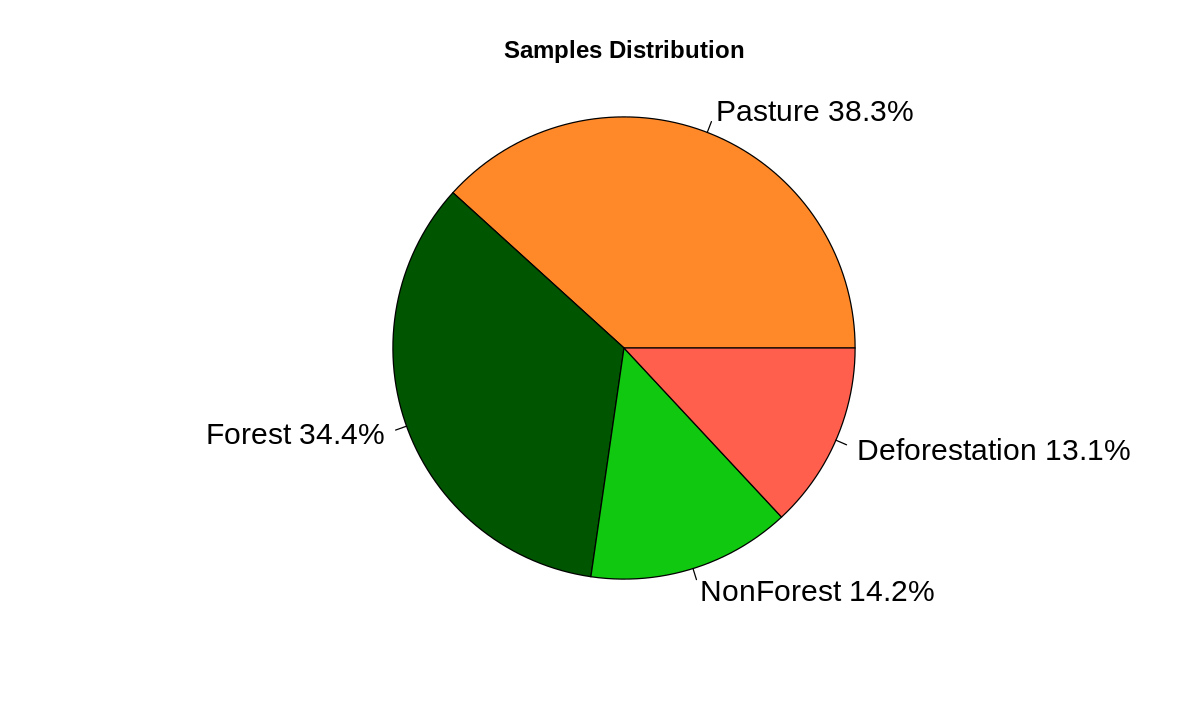

In [9]:
options(repr.plot.width = 10, repr.plot.height = 6)
pie(
    labels_summary$percent,
    paste(labels_summary$label, " ", round(labels_summary$percent * 100, 1), "%", sep=""),
    col = labels_summary$color,
    main = "Samples Distribution",
    cex = 1.5,
    radius = 1
)

You can view the region of interest in this [GeoJSON File](https://github.com/AbnerErnaniADSFatec/sample-assessment-data-science/blob/main/data/shapes/region_of_interest.json) and the Land Use and Land Cover Samples from [SITS Data](https://github.com/e-sensing/sitsdata). You can also test this coordinates using EPSG:4326 in this link [Kenee Maps](https://www.keene.edu/campus/maps/tool/).

In this case we will use the SpatialPoints to create a colection of points to extract the bounding box.

After extract the bounding box we need to convert this data in a region of interest object like described below and convert the region of interest in a table with latitude and longitude to view the samples spatial extent in the map:

In [10]:
bbox <- cbind(longitude = samples$longitude, latitude = samples$latitude) %>%
    SpatialPoints() %>%
        bbox()
roi <-  c(
    lon_min = as_tibble(bbox)$min[[1]],
    lon_max = as_tibble(bbox)$max[[1]],
    lat_min = as_tibble(bbox)$min[[2]],
    lat_max = as_tibble(bbox)$max[[2]]
)
bbox_shape <- list(
    longitude = c(roi[["lon_min"]], roi[["lon_max"]]),
    latitude = c(roi[["lat_min"]], roi[["lat_max"]])
) %>% as.data.frame()
bbox_shape

longitude latitude 
1 -65.27259 -10.96711
2 -63.69919  -9.95304

Below there is a code to view the samples by class and date with spatial extent in bounding box:

In [11]:
shape <- point_to_shape_sp(data.tb = samples)
leaflet(shape, options = leafletOptions(minZoom = 0, maxZoom = 100)) %>%
    addProviderTiles('Esri.WorldImagery') %>%
        addRectangles(
            lng1 = bbox_shape$longitude[[1]], bbox_shape$latitude[[1]],
            lng2 = bbox_shape$longitude[[2]], bbox_shape$latitude[[2]],
            fillColor = "transparent",
            popup = "Bounding Box") %>%
            addCircleMarkers(
                ~longitude, ~latitude,
                fillOpacity = 1,
                fillColor = ~color,
                stroke = F,
                radius = 5,
                popup = ~as.character(
                    paste("Class '", label,
                          "' #id", sample_id, "|",
                          format(
                              as.Date(start_date),
                              format = "Start %Y-%m-%d"
                          ),
                          format(
                              as.Date(end_date),
                              format = "End %Y-%m-%d"
                          )
                )))

> Obs.: The code above will generate a map output that is not visible on github:
> <p align = "center">
  <img src = "./img/leaflet_output_label.png">
</p>

We can view the time series for one class and selecting the bands by `sits_select` method:

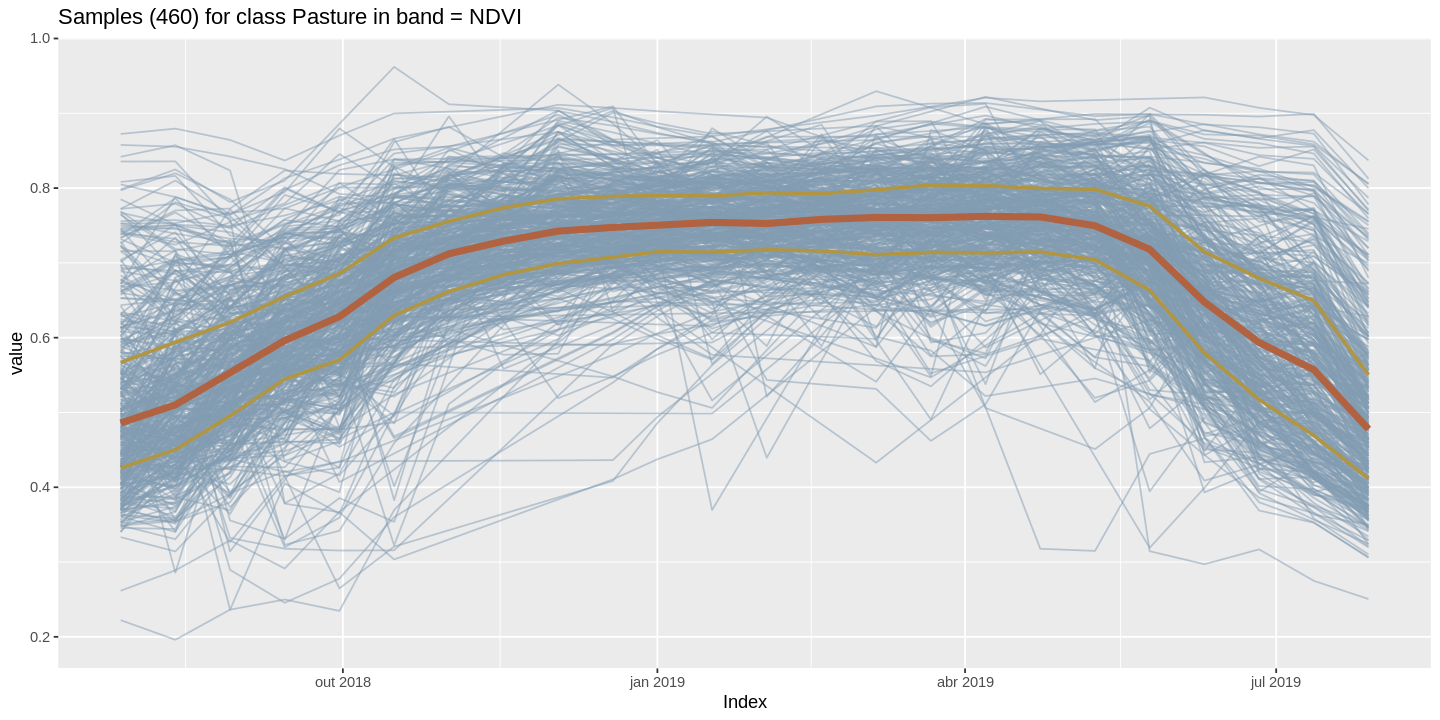

In [13]:
options(repr.plot.width = 12, repr.plot.height = 6)
filtered <- dplyr::filter(samples, label == "Pasture")
plot(sits_select(filtered, bands = "NDVI"))

To visualize the NDVI time series patterns for the LULC classes we can use the method `sits_patterns` that uses a generalised additive model to predict an idealized and smooth approximation of the time series associated with each label, for all bands.

> Obs.: This methods are described in sits-book.

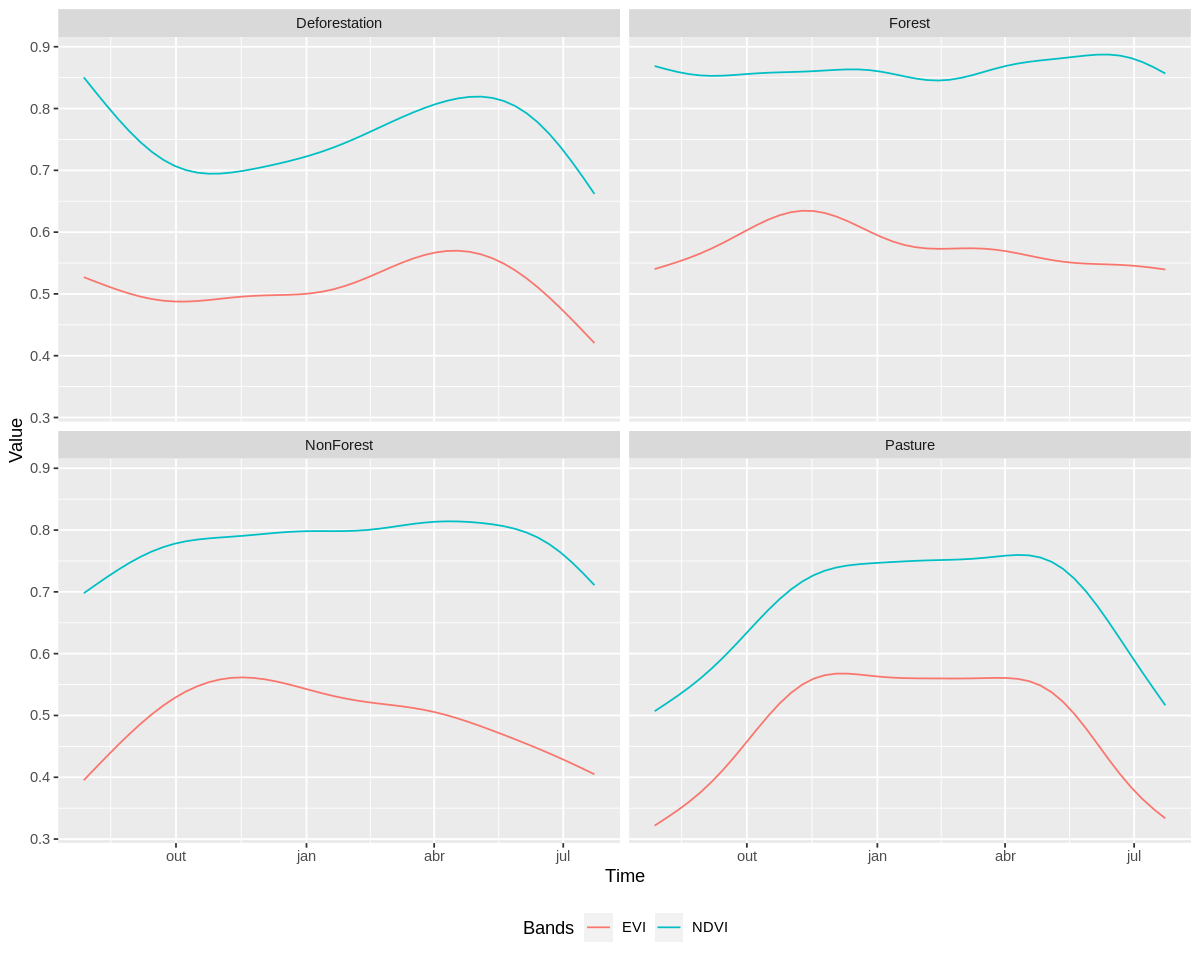

In [12]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot(sits_patterns(sits_select(samples, bands = c("NDVI", "EVI"))))

## Using Traditional ways

### Random Forest

In [29]:
samples_filtered <- sits_whittaker(
    samples,
    lambda = 0.4,
    bands_suffix = ""
) %>% get_train_test_set(prop = 0.7)
print(paste("Trainig data set =", nrow(samples_filtered$train), "samples"))
print(paste("Testing data set =", nrow(samples_filtered$test), "samples"))

[1] "Trainig data set = 841 samples"
[1] "Testing data set = 361 samples"


In [48]:
sits_rfor_method <- sits::sits_rfor(num_trees = 200)

In [49]:
rfor_model <- sits_train(
    data = samples_filtered$train,
    ml_method = sits_rfor_method
)

In [50]:
# Classify using TempCNN model and plot the result
class <- samples_filtered$test %>% sits_classify(rfor_model)
results <- sits_accuracy(class)
results

Confusion Matrix and Statistics

               Reference
Prediction      Pasture Forest NonForest Deforestation
  Pasture           145      1         3             1
  Forest              1    110         9             0
  NonForest           5      4        37             2
  Deforestation       0      1         0            42

Overall Statistics
                           
 Accuracy : 0.9252         
   95% CI : (0.893, 0.9501)
                           
    Kappa : 0.8911         

Statistics by Class:

                          Class: Pasture Class: Forest Class: NonForest
Prod Acc (Sensitivity)            0.9603        0.9483           0.7551
Specificity                       0.9762        0.9592           0.9647
User Acc (Pos Pred Value)         0.9667        0.9167           0.7708
Neg Pred Value                    0.9716        0.9751           0.9617
                          Class: Deforestation
Prod Acc (Sensitivity)                  0.9333
Specificity                   

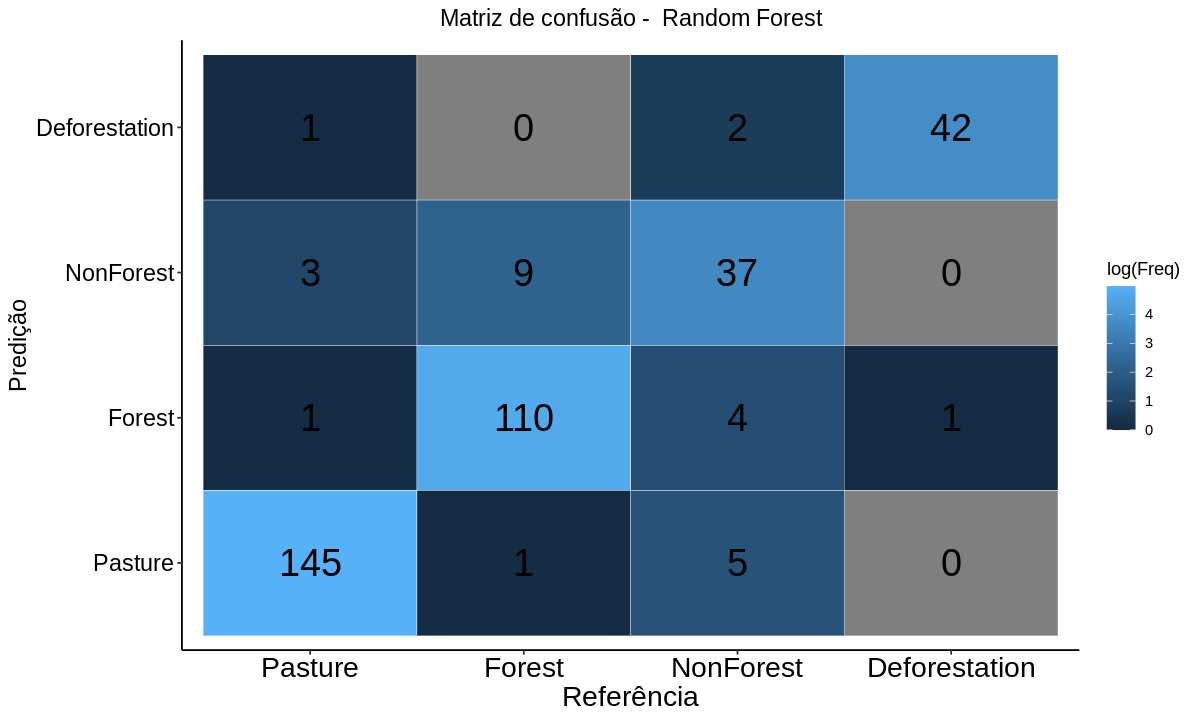

In [51]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot_rf <- cm_plot(results, model_type = "Random Forest")
plot_rf

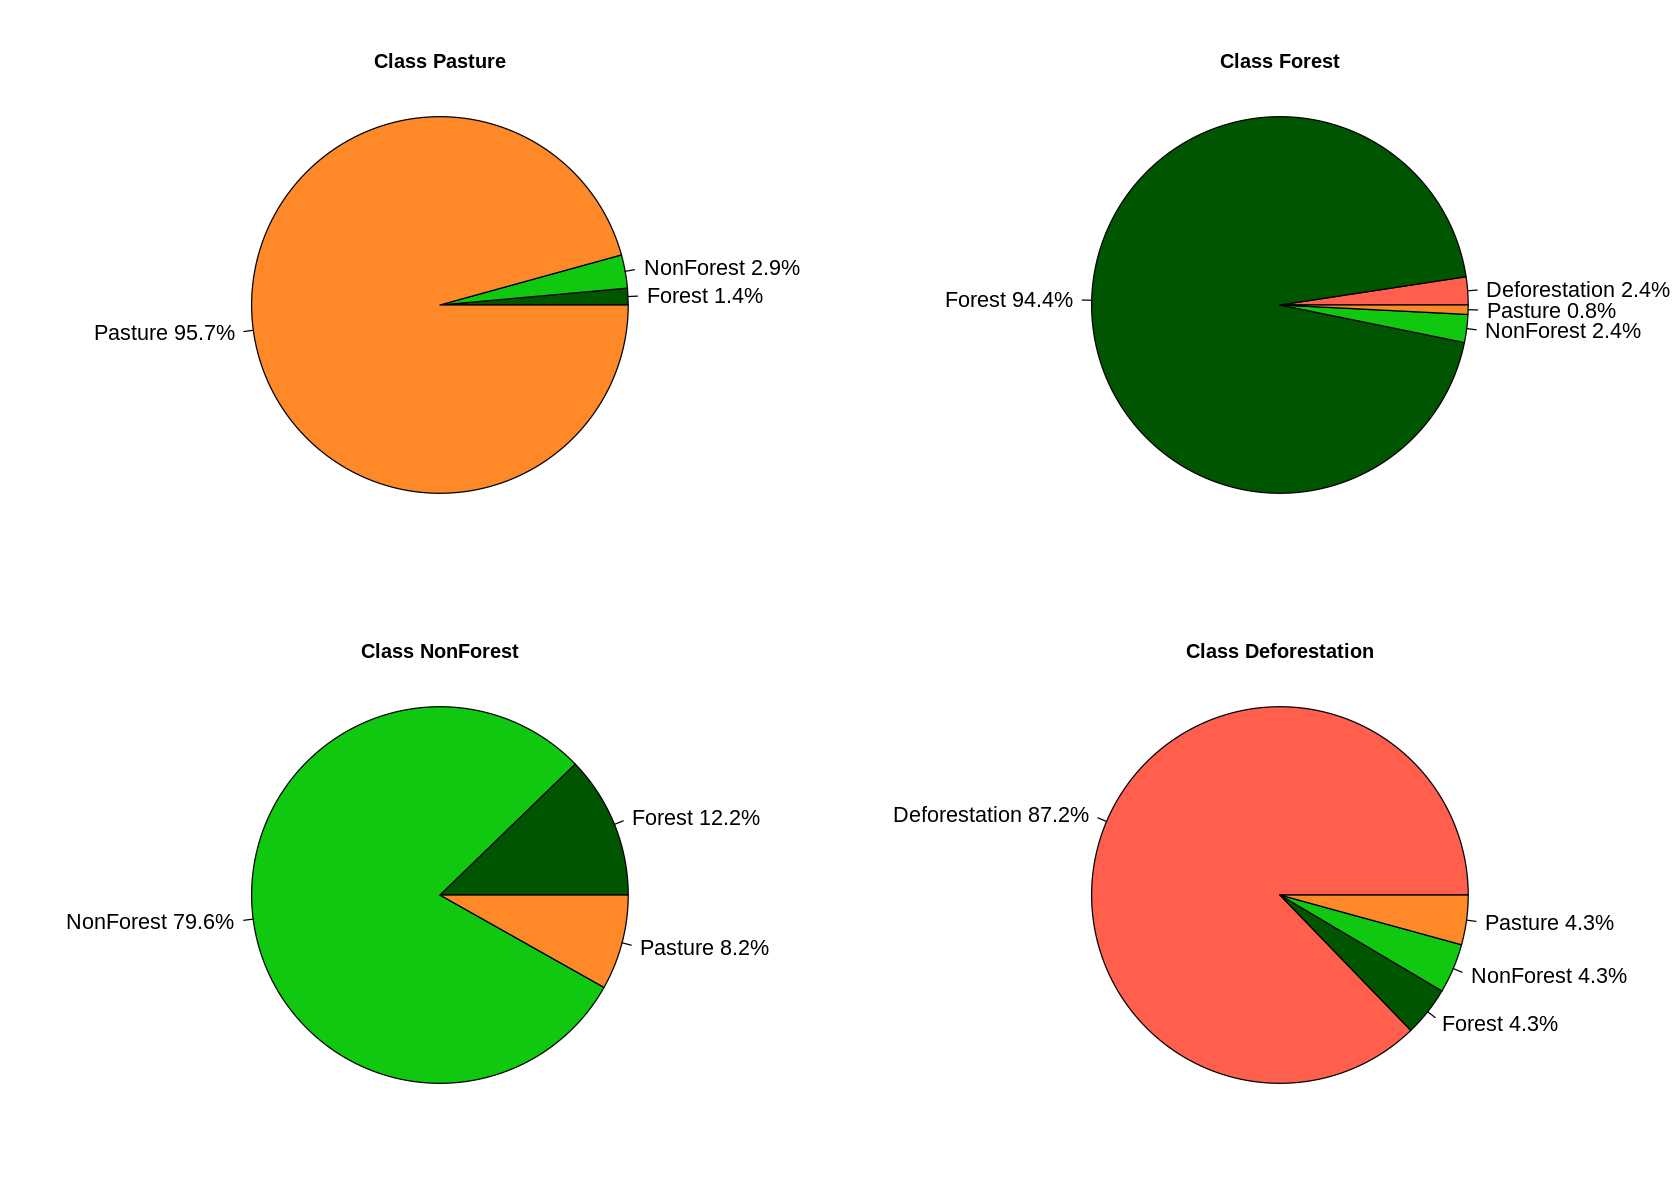

In [44]:
options(repr.plot.width = 14, repr.plot.height = 10)
par(mfrow = c(2,2), oma = c(0,0,1,0), tck = 0)
confusion <- as.data.frame(results$table)
for (i in 1:length(labels_summary$label)) {
    filtered <- dplyr::filter(confusion, Reference == labels_summary[i, ]$label)
    colors <- c()
    for (i in 1:length(filtered$Prediction)) {
        label <- as.character(filtered$Prediction[[i]])
        colors <- append(colors, color.label(label))
    }
    mutation_ <- dplyr::mutate(filtered, percent = Freq/sum(Freq), color = colors)
    mutation_ <- dplyr::filter(mutation_, percent > 0)
    pie(
        mutation_$percent,
        paste(mutation_$Prediction, " ", round((mutation_$percent * 100), 1), "%", sep=""),
        col = mutation_$color,
        main = paste("Class", mutation_$Reference[[1]]),
        cex = 1.3,
        radius = 1
    )
}
box(col = "white")

### Temporal Convolutional Neural Networks (TempCNN)

_Convolutional Neural Networks_ (CNN) or _Convolutional Neural Networks_ (ConvNET) are a specialized type of neural network for processing data that have a degree topology of one to two dimensions.

That's why CNNs perform excellently for image classification tasks.

How convolutional networks have a family of models inspired by how the human brain's visual cortex works when recognizing objects.

The development of CNNs dates back to the 1990s, when Yann LeCun and his colleagues proposed a new neural network architecture for classifying manuscripts from images (Recognition of manuscript data with a back-propagation network, Y LeCun et al., 1989, published, published at the Neural Information Processing Systems (NIPS) Conference).

Thus CNN can also be defined as a Deep Learning algorithm that can receive an input image, assign importance (learnable weights and images) to various aspects/objects in the image and be able to differentiate from each other.

It receives this name because it has convolution layers that, together with other types of layers, determine a specific architecture for this particular one, as we will see later.

A convolutional layer performs the learning of multiple filters, where each filter – or kernel – extracts information from the image. As stated before, other layers are used in conjunction with the convolutional one.

The pre-processing required in a ConvNet is much less compared to other classification algorithms.

In this notebook we will use the TempCNN implemented by SITS that user a 1D input for time series classification and learn temporal patterns as presented by the figure. The method `sits_TempCNN` implements the model.

<p align = "center" style = "width: 80%;">
  <img src = "./img/tempcnn-model.png">
</p>

The `sits_whittaker` as described by sits documentation, applies the Wittaker smoother attempts to fit a curve that represents the raw data, but is penalized if subsequent points vary too much.

And as explored by sits book, in the same way as what is observed in the Savitsky-Golay filter, high values of the smoothing parameter lambda produce an oversmoothed time series that reduces the capacity of the time series to represent natural variations on crop growth.

For this notebook we will use 70% of data set to fit the model and 30% to test and get the accuracy for the model:

In [47]:
samples_filtered <- sits_whittaker(
    samples,
    lambda = 0.4,
    bands_suffix = ""
) %>% get_train_test_set(prop = 0.7)
print(paste("Trainig data set =", nrow(samples_filtered$train), "samples"))
print(paste("Testing data set =", nrow(samples_filtered$test), "samples"))

[1] "Trainig data set = 841 samples"
[1] "Testing data set = 361 samples"


Now we can fit the model with the hiperparameters described below:

In [52]:
# train a machine learning model using tempCNN
sits_tempcnn_method <- sits_TempCNN(
    cnn_layers = c(64, 64, 64),
    cnn_kernels = c(8, 8, 8),
    cnn_activation = 'relu',
    cnn_L2_rate = 1e-06,
    cnn_dropout_rates = c(0.8, 0.8, 0.8),
    epochs = 100,
    batch_size = 64,
    validation_split = 0.2,
    verbose = 3,
    optimizer = keras::optimizer_adam()
)

In [60]:
tempCNN_model <- sits_train(
    data = samples_filtered$train,
    ml_method = sits_tempcnn_method
)

And after the training process we can view the history accuracy and loss function:

`geom_smooth()` using formula 'y ~ x'



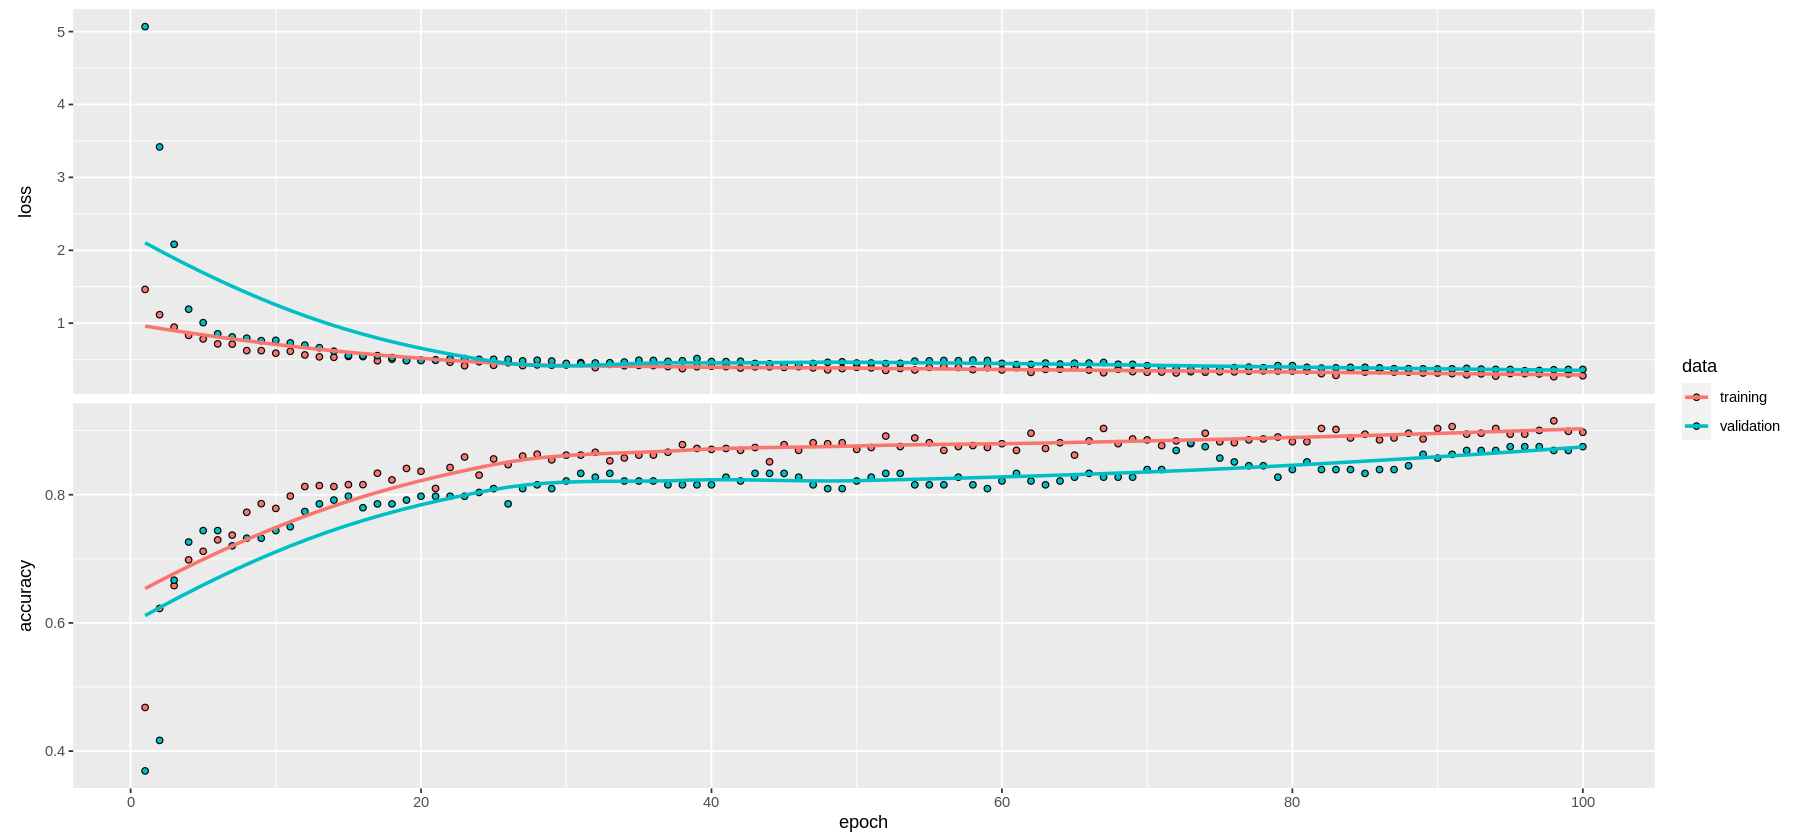

In [61]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(tempCNN_model)

It seems that the accuracy during training had an increasing trend and the cost function varied during training.

Let's see the accuracy for the test data set and the confusion between classes:

In [62]:
# Classify using TempCNN model and plot the result
class <- samples_filtered$test %>% sits_classify(tempCNN_model)
results <- sits_accuracy(class)
results

Confusion Matrix and Statistics

               Reference
Prediction      Pasture Forest NonForest Deforestation
  Pasture           138      1         0             1
  Forest              1    111        12             3
  NonForest           9      3        36             3
  Deforestation       3      1         1            38

Overall Statistics
                            
 Accuracy : 0.8947          
   95% CI : (0.8584, 0.9244)
                            
    Kappa : 0.8476          

Statistics by Class:

                          Class: Pasture Class: Forest Class: NonForest
Prod Acc (Sensitivity)            0.9139        0.9569           0.7347
Specificity                       0.9905        0.9347           0.9519
User Acc (Pos Pred Value)         0.9857        0.8740           0.7059
Neg Pred Value                    0.9412        0.9786           0.9581
                          Class: Deforestation
Prod Acc (Sensitivity)                  0.8444
Specificity              

As a result we can view the confusion using this output:

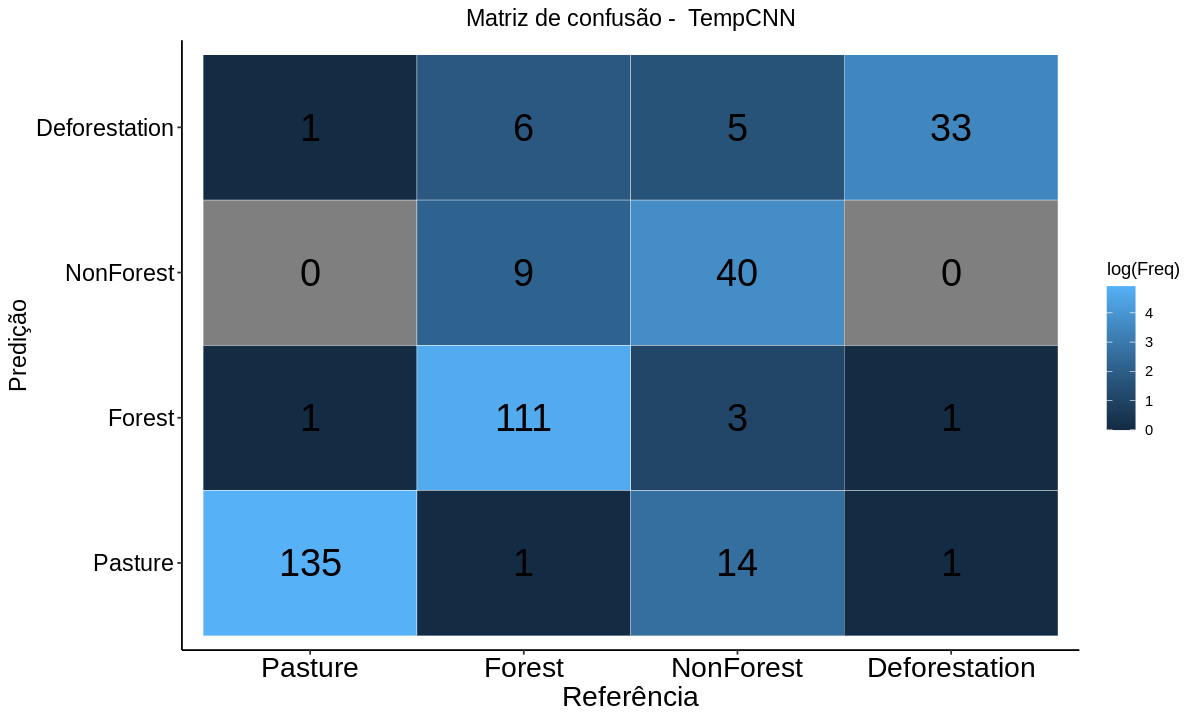

In [58]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot_tcnn <- cm_plot(results, model_type = "TempCNN")
plot_tcnn

Let's see the confusion in a pie chart:

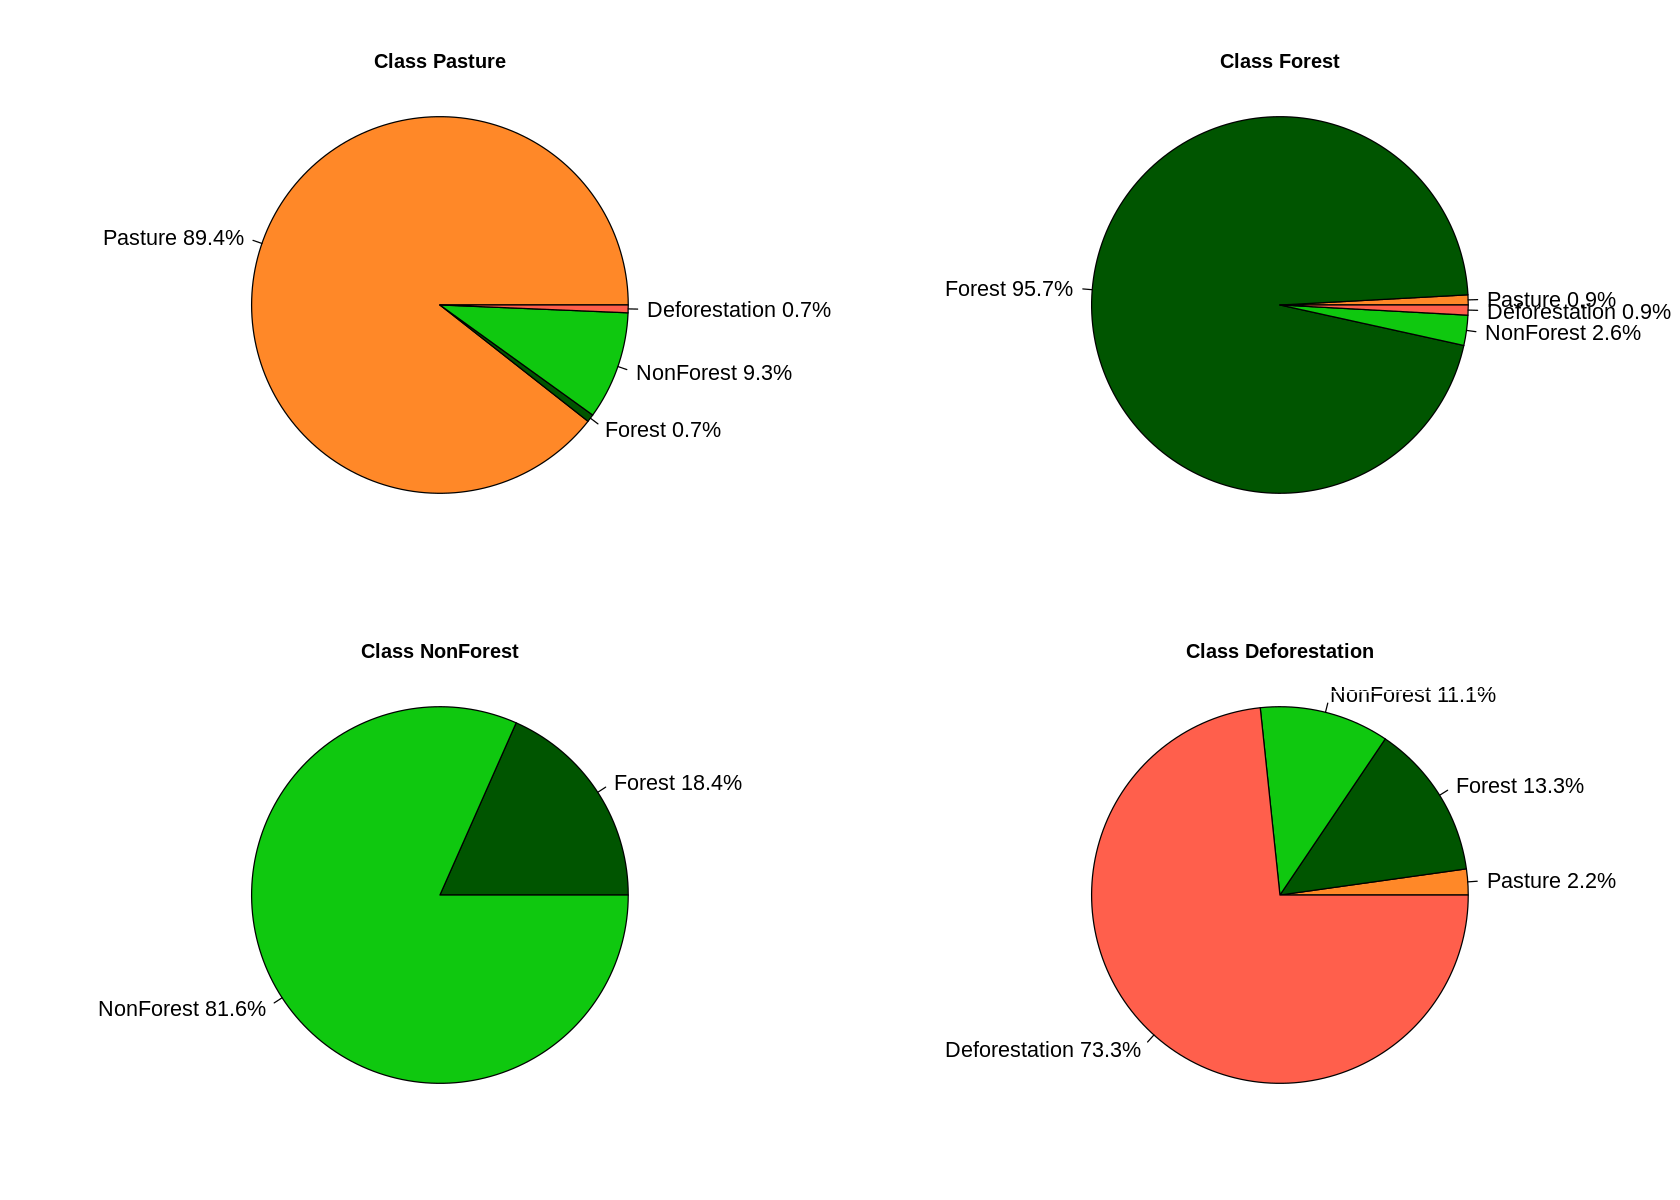

In [59]:
options(repr.plot.width = 14, repr.plot.height = 10)
par(mfrow = c(2,2), oma = c(0,0,1,0), tck = 0)
confusion <- as.data.frame(results$table)
for (i in 1:length(labels_summary$label)) {
    filtered <- dplyr::filter(confusion, Reference == labels_summary[i, ]$label)
    colors <- c()
    for (i in 1:length(filtered$Prediction)) {
        label <- as.character(filtered$Prediction[[i]])
        colors <- append(colors, color.label(label))
    }
    mutation_ <- dplyr::mutate(filtered, percent = Freq/sum(Freq), color = colors)
    mutation_ <- dplyr::filter(mutation_, percent > 0)
    pie(
        mutation_$percent,
        paste(mutation_$Prediction, " ", round((mutation_$percent * 100), 1), "%", sep=""),
        col = mutation_$color,
        main = paste("Class", mutation_$Reference[[1]]),
        cex = 1.3,
        radius = 1
    )
}
box(col = "white")

## Using Active Learning

Land Use and Land Cover Classification (UCT) methods generally require a dense set of samples for the training and validation of a classifier model based on the extraction of features from remote sensing time series. However, these samples, whether collected in the field or through visual interpretation by high resolution images, in short are noisy or have a time series with null values due to cloud cover. Samples also have problems such as spatial distribution, class balance, and duplicated data.
This proposal aims to develop a method to solve the problem of lack of training data, with the generation of representative samples using Active Learning strategies together with a TempCNN (Temporal Convolutional Neural Networks) convolutional neural network model.

Active Learning is a simple technique for labeling data, which involves first selecting a few instances of an unlabeled dataset, which are annotated by a human oracle (Expert) or by metrics analysis, which is then repeated several times until a closing criterion is met, for example, the annotation budget runs out. Most of the time, the selection function is based on predictions from a trained model, which has been fitted to the dataset labeled at each stage of the algorithm, where targets are selected based on the model's predictive uncertainty, or divergence in predictions about a set.

This method is used when the training dataset is very small, bringing together semi-supervised learning techniques. In this way the model is trained with available data and then used to estimate probabilities and metrics of unlabeled data. With the analysis of metrics or manual validation of the oracle, it is possible to identify the most representative samples that can enrich the initial dataset, obtaining more accurate results in each training interaction of the model. The main idea of this method is to find the instances in which the model is most likely to learn, so that after its labeling and inclusion in the training set, the model becomes more robust to errors.
Active Learning techniques can be described as a sequence of decisions, where the steps correspond to the state of the system. With this thought we can apply reinforcement learning techniques that are based on training a model to make a sequence of decisions. The agent learns to reach a goal in an uncertain and potentially complex environment, a problem. The intelligent system uses trial and error to find a solution to the problem, so the artificial intelligence receives rewards or penalties for the actions it performs. Your goal is to maximize the total reward.

<p align = "center" style = "width: 80%;">
  <img src = "./img/al_process_fluxogram.png">
</p>

At each interaction of Active Learning steps, the system needs to find samples with greater representation based on the calculated metrics. Reinforcement learning can be applied by penalizing the system when faced with samples with metrics considered of low quality or that cause more uncertainty in the model for training and rewarding when finding samples considered representative.

Therefore, the use of reinforcement learning can be a benefit for Active Learning techniques, especially for the strategy to be used to identify samples that are representative in an unlabeled dataset. However, there are some challenges such as preparing the environment to scale and adjust the neural network model to control the agent and also storing the history of rewards and penalties, which can be a problem for acquiring new data when forgetting the old ones. In Active Learning, the main problem is overfitting, so the process of analyzing the metrics to apply for new samples must be well planned.

[activelearning](./R/activelearning) Package.

### Defining an initial data set

In [277]:
n_samples_per_label <- 5

# Defining an initial data set to start iterations
labelled_data <- random_samples_per_class(samples, n_samples_per_label)
dplyr::select(labelled_data, -time_series)

sample_id longitude latitude  start_date end_date   label        
1   760      -64.95674 -10.00693 2018-07-28 2019-07-28 Deforestation
2   770      -64.89312 -10.30823 2018-07-28 2019-07-28 Deforestation
3   804      -64.84594 -10.16775 2018-07-28 2019-07-28 Deforestation
4    43      -64.33712 -10.42870 2018-07-28 2019-07-28 Deforestation
5     8      -64.69219 -10.08113 2018-07-28 2019-07-28 Deforestation
6   179      -64.37954 -10.02678 2018-07-28 2019-07-28 Forest       
7   324      -63.80895 -10.70317 2018-07-28 2019-07-28 Forest       
8   841      -65.22359 -10.53325 2018-07-28 2019-07-28 Forest       
9   133      -64.67558 -10.24243 2018-07-28 2019-07-28 Forest       
10  761      -64.90712 -10.14453 2018-07-28 2019-07-28 Forest       
11  469      -64.04188 -10.52392 2018-07-28 2019-07-28 NonForest    
12  397      -64.63086 -10.55096 2018-07-28 2019-07-28 NonForest    
13  414      -64.69817 -10.57353 2018-07-28 2019-07-28 NonForest    
14  404      -64.56117 -10.57808 2018-07-28 2019-07-28 NonForest    
15 1011      -65.08437 -10.92963 2018-07-28 2019-07-28 NonForest    
16  491      -64.66035 -10.34443 2018-07-28 2019-07-28 Pasture      
17 1158      -64.91859 -10.30817 2018-07-28 2019-07-28 Pasture      
18 1153      -65.01377 -10.80863 2018-07-28 2019-07-28 Pasture      
19 1165      -65.12893 -10.10746 2018-07-28 2019-07-28 Pasture      
20  749      -64.92910 -10.09685 2018-07-28 2019-07-28 Pasture      
   cube           
1  sentinel-077095
2  sentinel-077095
3  sentinel-077095
4  sentinel-077095
5  sentinel-077095
6  sentinel-077095
7  sentinel-077095
8  sentinel-077095
9  sentinel-077095
10 sentinel-077095
11 sentinel-077095
12 sentinel-077095
13 sentinel-077095
14 sentinel-077095
15 sentinel-077095
16 sentinel-077095
17 sentinel-077095
18 sentinel-077095
19 sentinel-077095
20 sentinel-077095

In [278]:
new_samples <- dplyr::filter(samples, !(sample_id %in% labelled_data$sample_id)) %>% dplyr::mutate(true_label = label, label = "Unknown", .after = 6)
head(dplyr::select(new_samples, -time_series), 5)

sample_id longitude latitude   start_date end_date   label   true_label   
1 1         -64.69448  -9.986312 2018-07-28 2019-07-28 Unknown Deforestation
2 2         -64.62979  -9.996668 2018-07-28 2019-07-28 Unknown Deforestation
3 3         -64.52163  -9.979772 2018-07-28 2019-07-28 Unknown Deforestation
4 4         -64.52049 -10.003682 2018-07-28 2019-07-28 Unknown Deforestation
5 5         -64.70766 -10.061506 2018-07-28 2019-07-28 Unknown Deforestation
  cube           
1 sentinel-077095
2 sentinel-077095
3 sentinel-077095
4 sentinel-077095
5 sentinel-077095

In [279]:
shape <- point_to_shape_sp(data.tb = labelled_data)
leaflet(shape, options = leafletOptions(minZoom = 0, maxZoom = 100)) %>%
    addProviderTiles('Esri.WorldImagery') %>%
        addRectangles(
            lng1 = bbox_shape$longitude[[1]], bbox_shape$latitude[[1]],
            lng2 = bbox_shape$longitude[[2]], bbox_shape$latitude[[2]],
            fillColor = "transparent",
            popup = "Bounding Box") %>%
            addCircleMarkers(
                ~longitude, ~latitude,
                fillOpacity = 1,
                fillColor = ~color,
                stroke = F,
                radius = 5,
                popup = ~as.character(
                    paste("Class '", label,
                          "' #id", sample_id, "|",
                          format(
                              as.Date(start_date),
                              format = "Start %Y-%m-%d"
                          ),
                          format(
                              as.Date(end_date),
                              format = "End %Y-%m-%d"
                          )
                )))

Error : Problem with `filter()` input `..1`.
ℹ Input `..1` is `(as.Date(start_date) <= as.Date(date)) & (as.Date(date) <= as.Date(end_date))`.
✖ argument "date" is missing, with no default
Error : Can't subset columns that don't exist.
✖ Column `id_neuron` doesn't exist.
Error : Problem with `filter()` input `..1`.
ℹ Input `..1` is `label == class_label`.
✖ argument "class_label" is missing, with no default


HTML widgets cannot be represented in plain text (need html)

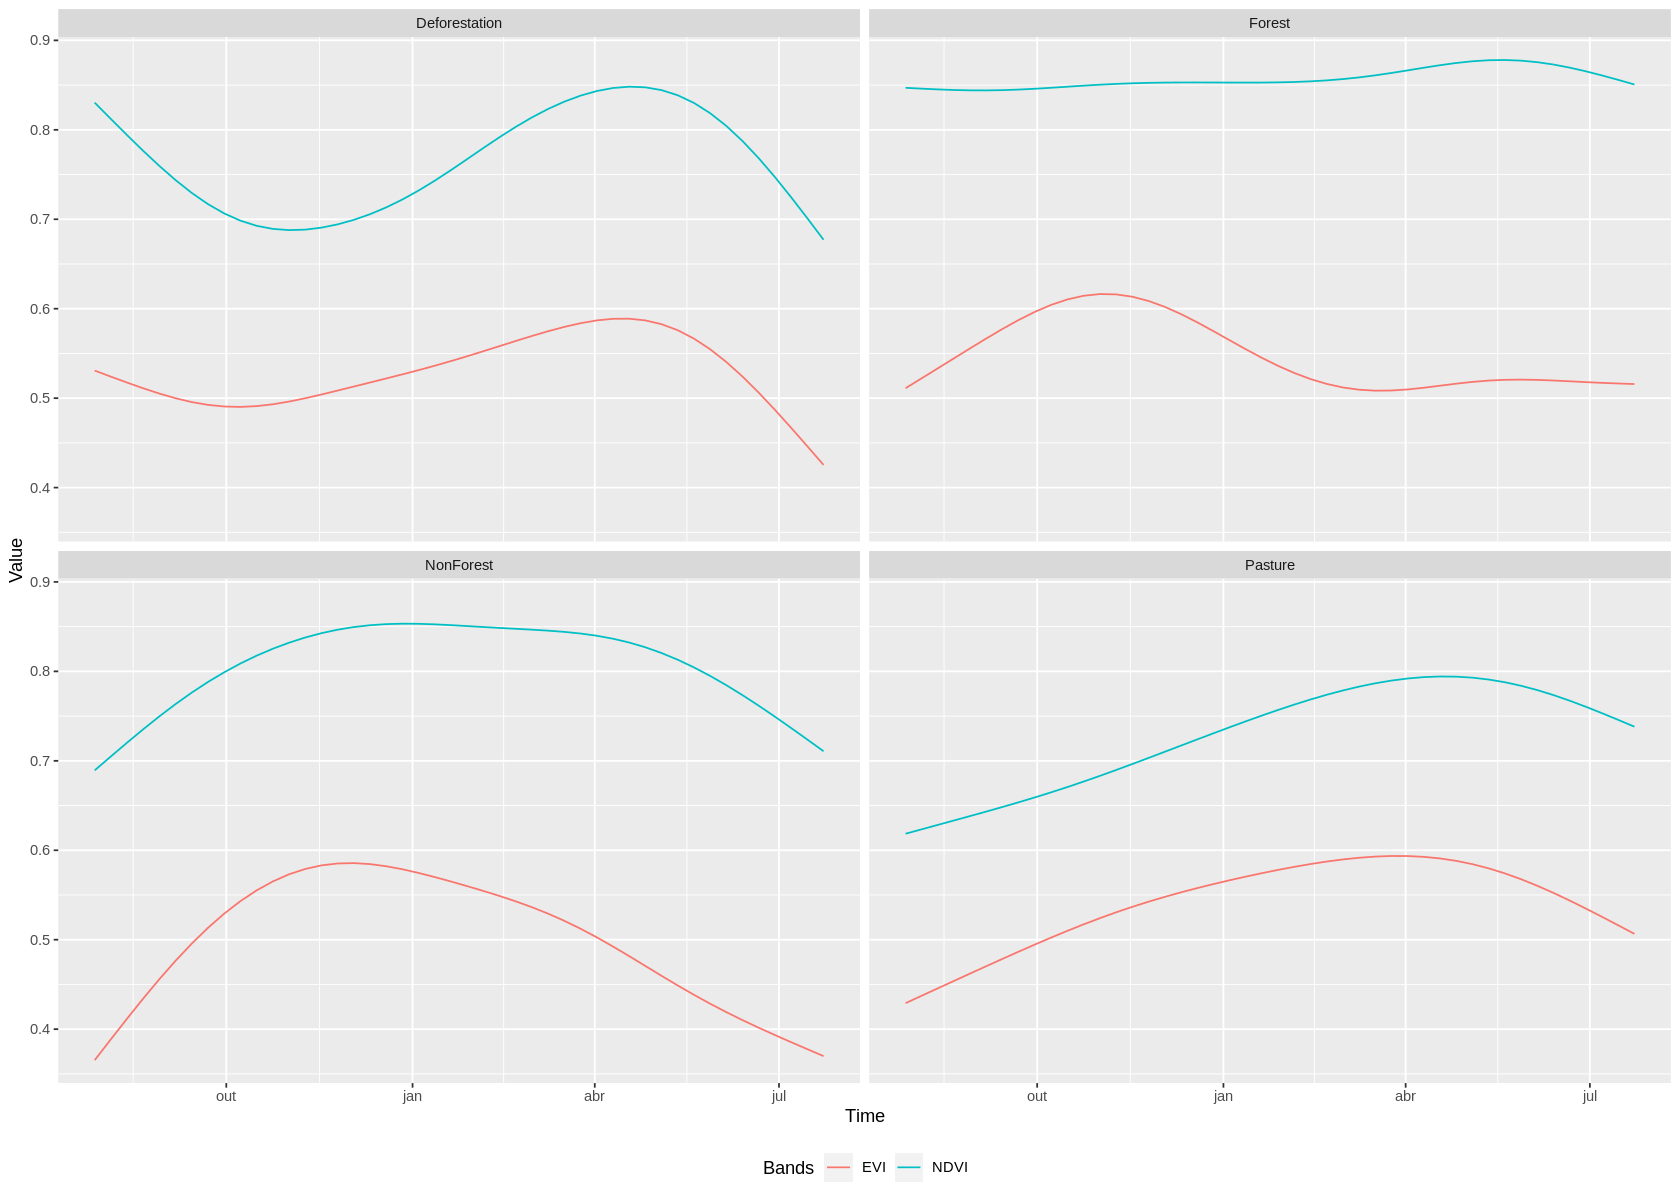

In [280]:
options(repr.plot.width = 14, repr.plot.height = 10)
plot(labelled_data %>% sits_select(bands = c("NDVI", "EVI")) %>% sits_patterns())

### Simulation of an iteration

#### Training model with initial dataset

In [287]:
# train a machine learning model using tempCNN
tempCNN_model <- sits_train(
    data = labelled_data,
    ml_method = sits_tempcnn_method
)

`geom_smooth()` using formula 'y ~ x'



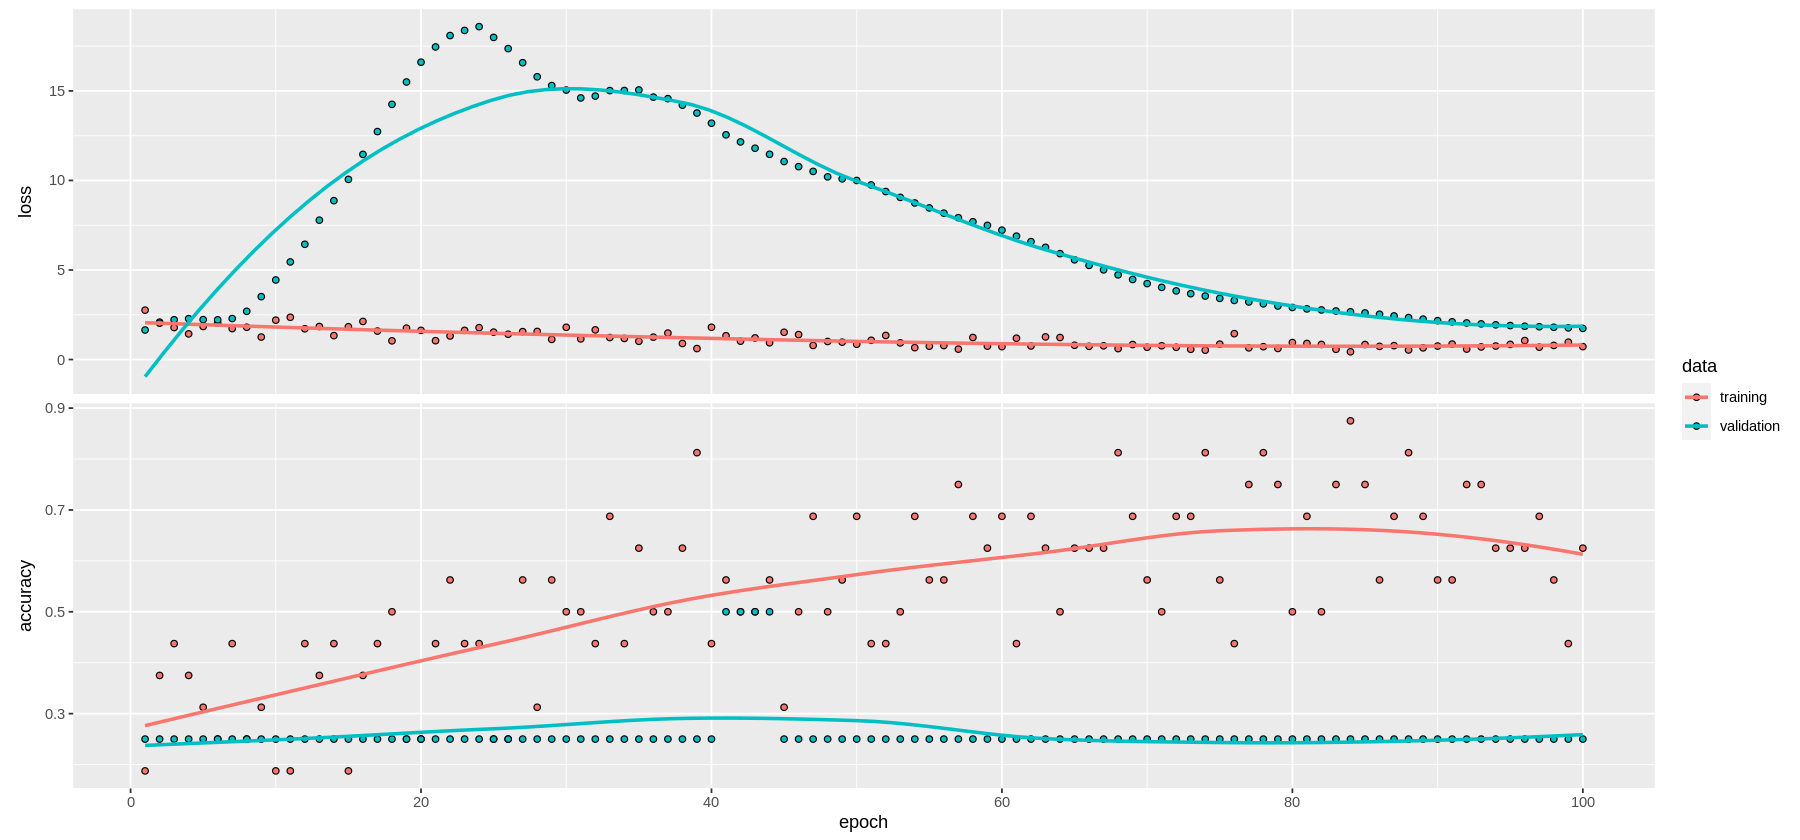

In [288]:
options(repr.plot.width = 15, repr.plot.height = 7)
plot(tempCNN_model)

#### Classifying new samples

In [289]:
# Classify using TempCNN model and plot the result

to_classify <- dplyr::mutate(new_samples, label = true_label, true_label = NULL)
potential_samples <- random_samples_per_class(to_classify, n_samples_per_label * 4)

class <- potential_samples %>% sits_classify(tempCNN_model)
results <- sits_accuracy(class)
results

Confusion Matrix and Statistics

               Reference
Prediction      Deforestation Forest NonForest Pasture
  Deforestation             6      1         2       0
  Forest                    3     10         0       0
  NonForest                 0      0         0       0
  Pasture                  11      9        18      20

Overall Statistics
                            
 Accuracy : 0.45            
   95% CI : (0.3385, 0.5653)
                            
    Kappa : 0.2667          

Statistics by Class:

                          Class: Deforestation Class: Forest Class: NonForest
Prod Acc (Sensitivity)                  0.3000        0.5000             0.00
Specificity                             0.9500        0.9500             1.00
User Acc (Pos Pred Value)               0.6667        0.7692              NaN
Neg Pred Value                          0.8028        0.8507             0.75
                          Class: Pasture
Prod Acc (Sensitivity)            1.0000
Specifi

#### Estimate probabilities

In [290]:
prediction <- random_samples(class, 5, "Pasture")
dplyr::select(prediction, -time_series)

sample_id longitude latitude  start_date end_date   label   cube           
1  724      -63.96750 -10.00002 2018-07-28 2019-07-28 Pasture sentinel-077095
2  946      -64.83574 -10.26662 2018-07-28 2019-07-28 Pasture sentinel-077095
3  985      -65.01243 -10.71761 2018-07-28 2019-07-28 Pasture sentinel-077095
4  683      -64.05971 -10.19263 2018-07-28 2019-07-28 Pasture sentinel-077095
5 1121      -64.74975 -10.24982 2018-07-28 2019-07-28 Pasture sentinel-077095
  predicted                                                                                                                                               
1 17740               , 18105               , Pasture             , 0.0576204843819141  , 4.87733714093358e-13, 3.42332431390972e-14, 0.942379474639893   
2 17740               , 18105               , Pasture             , 0.031260471791029   , 2.66606036802841e-07, 1.04202094064476e-07, 0.968739151954651   
3 17740               , 18105               , Pasture             , 0.203607842326164   , 7.94501102063805e-05, 3.34993383148685e-05, 0.796279191970825   
4 17740               , 18105               , Pasture             , 0.110402196645737   , 5.80484960229985e-14, 5.25876551302922e-15, 0.889597773551941   
5 17740               , 18105               , Pasture             , 0.0152925765141845  , 1.64770009702248e-12, 1.04362427987698e-13, 0.984707415103912

In [291]:
toy_case <- list()
for (i in 1:length(prediction$predicted)) {
    probs <- as.data.frame(as.data.frame(prediction[i, ]$predicted)$probs)
    tryCatch(
        expr = {
            toy_case[["sample_id"]] <- append(toy_case[["sample_id"]], prediction[i, ]$sample_id)
            toy_case[["True_Label"]] <- append(toy_case[["True_Label"]], prediction[i, ]$label)
            toy_case[["Predicition"]] <- append(toy_case[["Predicition"]], as.data.frame(prediction[i, ]$predicted)$class)
        },
        error = function(e){
            toy_case[["sample_id"]] <- c()
            toy_case[["sample_id"]] <- append(toy_case[["sample_id"]], prediction[i, ]$sample_id)
            toy_case[["True_Label"]] <- c()
            toy_case[["True_Label"]] <- append(toy_case[["True_Label"]], prediction[i, ]$label)
            toy_case[["Prediction"]] <- c()
            toy_case[["Prediction"]] <- append(toy_case[["Prediction"]], as.data.frame(prediction[i, ]$predicted)$class)
        }
    )
    for (label in labels_summary$label) {
        tryCatch(
            expr = {
                toy_case[[label]] <- append(toy_case[[label]], probs[[label]])
            },
            error = function(e){ 
                toy_case[[label]] <- c()
                toy_case[[label]] <- append(toy_case[[label]], probs[[label]])
            }
        )
    }
}
toy_case <- as.data.frame(toy_case)
toy_case

sample_id True_Label Predicition Pasture   Forest       NonForest   
1  724      Pasture    Pasture     0.9423795 4.877337e-13 3.423324e-14
2  946      Pasture    Pasture     0.9687392 2.666060e-07 1.042021e-07
3  985      Pasture    Pasture     0.7962792 7.945011e-05 3.349934e-05
4  683      Pasture    Pasture     0.8895978 5.804850e-14 5.258766e-15
5 1121      Pasture    Pasture     0.9847074 1.647700e-12 1.043624e-13
  Deforestation
1 0.05762048   
2 0.03126047   
3 0.20360784   
4 0.11040220   
5 0.01529258

#### Getting Metrics for this 5 samples

- **Ratio of confidence:** Ratio between the most confident labels.

$RC = \frac {p(X_1)} {p(X_2)}$

- **Margin of confidence:** Difference between the most confident labels.

$MC = 1 - (p(X_1) - p(X_2))$

- **Least confidence:** Difference between 100% and the most confident label.

$LC = (1 - p_{max}(X)) \frac {n} {n - 1}$

- **Information entropy:** Information entropy measures the uncertainty in a classification.

$H = - \sum {p(X) \log {p(X)}}$

In [292]:
data_metrics <- get_metrics(prediction)
data_metrics

entropy    least_conf margin_conf ratio_conf prediction label  
1 0.22036941 0.07682737 0.11524101  16.354938  Pasture    Pasture
2 0.13910283 0.04168113 0.06252132  30.989268  Pasture    Pasture
3 0.50654592 0.27162774 0.40732865   3.910847  Pasture    Pasture
4 0.34735543 0.14720297 0.22080442   8.057791  Pasture    Pasture
5 0.07910395 0.02039011 0.03058516  64.391204  Pasture    Pasture

In [293]:
rownames(data_metrics) <- paste("Sample", rownames(data_metrics))
data_ <- dplyr::select(data_metrics, -ratio_conf, -prediction, -label)
data_ <- t(data_[, names(data_)])
data_

Sample 1   Sample 2   Sample 3  Sample 4  Sample 5  
entropy     0.22036941 0.13910283 0.5065459 0.3473554 0.07910395
least_conf  0.07682737 0.04168113 0.2716277 0.1472030 0.02039011
margin_conf 0.11524101 0.06252132 0.4073287 0.2208044 0.03058516

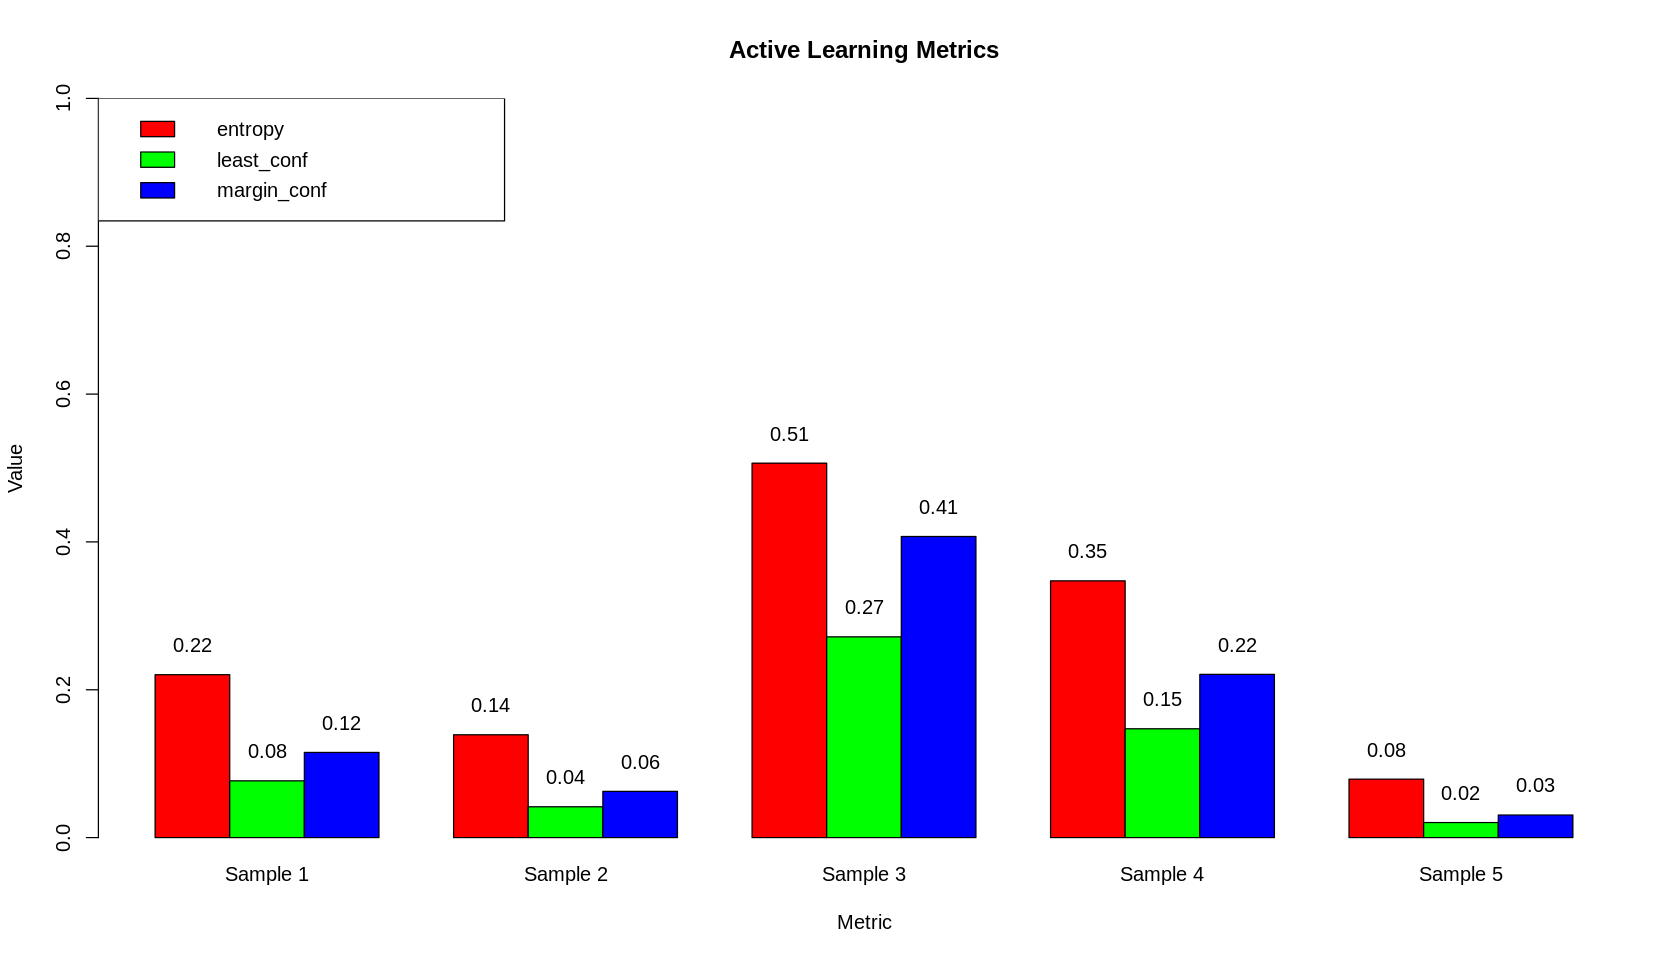

In [294]:
# This data is plotted as follows.
options(repr.plot.width = 14, repr.plot.height = 8)
colors <- rainbow(length(rownames(data_)))
data_ <- as.matrix(data_)
barp <- barplot(
    data_,
    main = "Active Learning Metrics",
    xlab = "Metric",
    ylab = "Value",
    col = colors,
    ylim = c(0, 1),
    beside = TRUE
)
text(barp, data_ + 0.04, labels = round(data_, 2))
legend(
    "topleft",
    rownames(data_),
    fill = colors
)

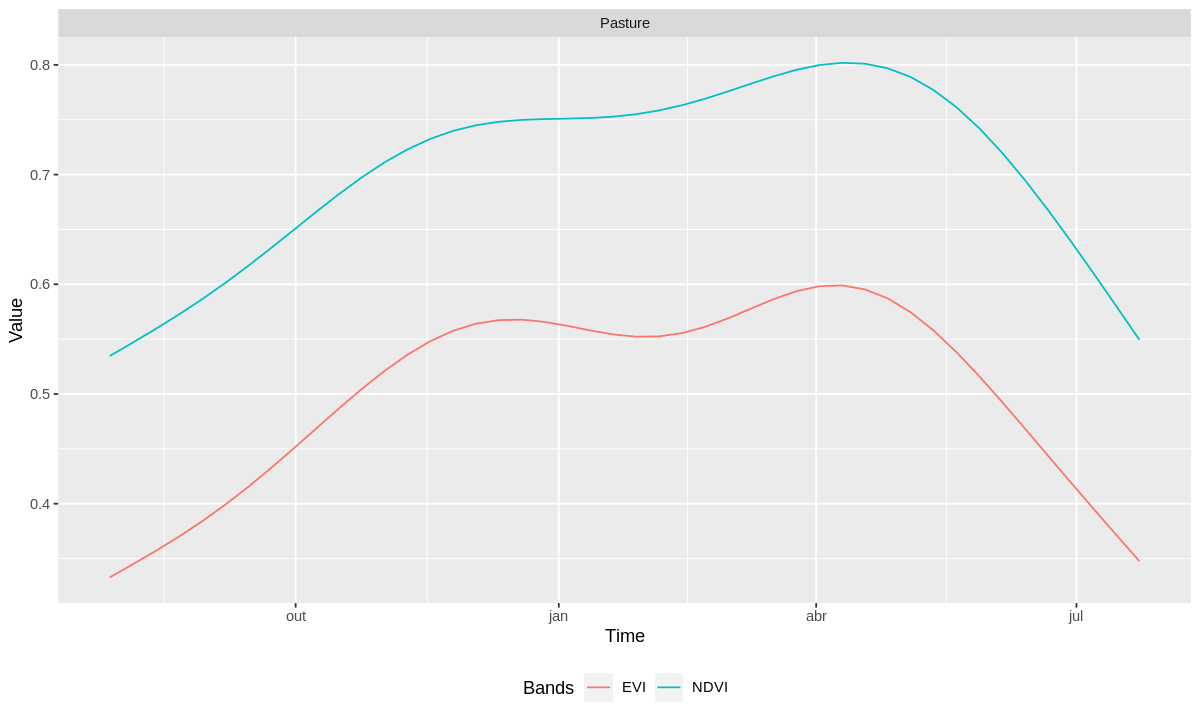

In [295]:
options(repr.plot.width = 10, repr.plot.height = 6)
test_case <- dplyr::filter(potential_samples, (sample_id %in% toy_case$sample_id))
plot(test_case %>% sits_select(bands = c("NDVI", "EVI")) %>% sits_patterns())

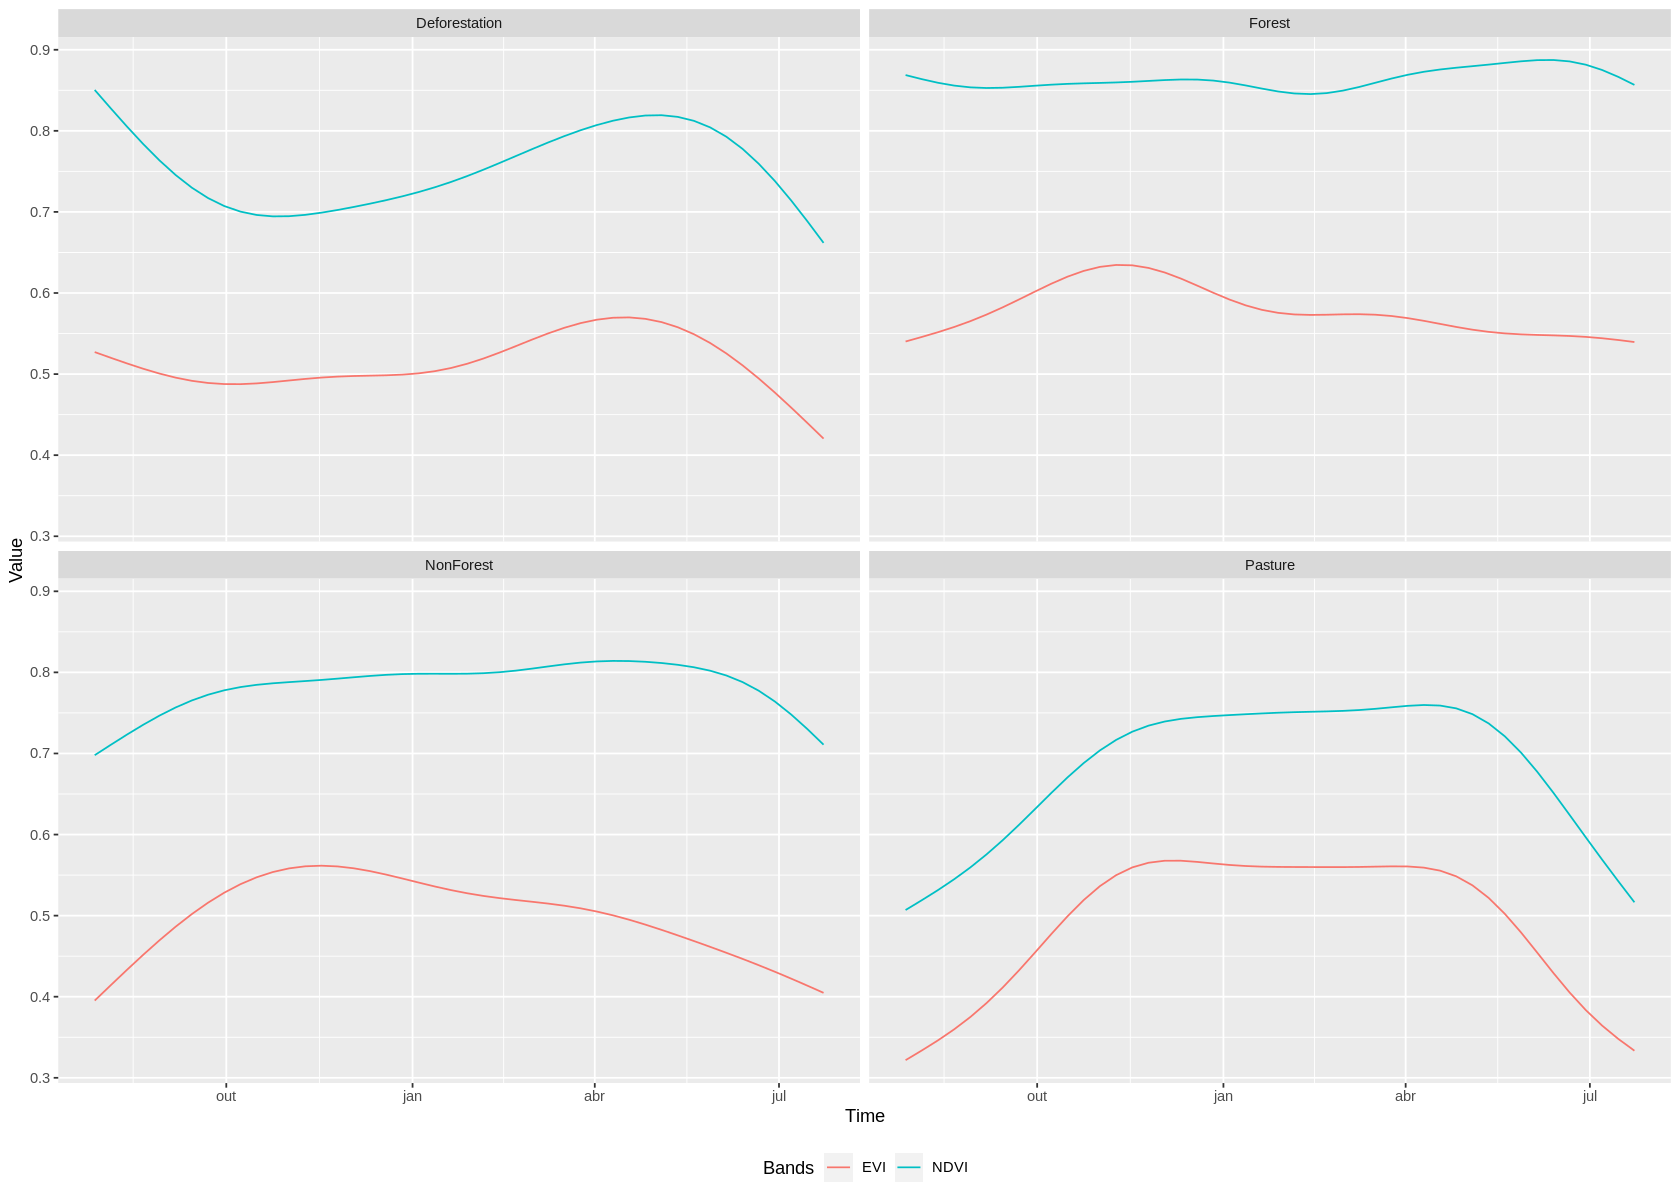

In [296]:
options(repr.plot.width = 14, repr.plot.height = 10)
plot(samples %>% sits_select(bands = c("NDVI", "EVI")) %>% sits_patterns())

#### Getting Accuracy

- **F1 Score:** In statistical analysis of binary classification, the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.

- **User Accuracy:** These are the estimates of the fractions of mapping pixels, for each class, correctly classified. User accuracy is associated with commission error, which is the error made when assigning a pixel to class i, when it belongs to some other class.

- **Productor Accuracy:** São as frações amostrais de píxels de cada classe corretamente atribuídos às suas classes pelos classificadores. A acurácia do produtor está associada ao erro de omissão, que ocorre quando deixamos de mapear um pixel da classe j corretamente.

In [297]:
labels <- labels_summary$label
metrics <- get_accuracy_metrics(results)
labels <- labels_summary$label
n_iteration <- 1
overall_accuracy <- dplyr::filter(metrics, metric == "accuracy")$accuracy[[1]]
metrics_tb <- list()
for (i in 1:length(labels)) {
    data_ <- dplyr::filter(metrics, class == labels[i])
    tryCatch(
        expr = {
            metrics_tb[["Label"]] <- append(metrics_tb[["Label"]], labels[[i]])
            
            score <- dplyr::filter(data_, metric == "f1_score")
            metrics_tb[["F1_Score"]] <- append(metrics_tb[["F1_Score"]], score$accuracy[[1]])
            
            score <- dplyr::filter(data_, metric == "user_acc")
            metrics_tb[["User_Accuracy"]] <- append(metrics_tb[["User_Accuracy"]], score$accuracy[[1]])
            
            score <- dplyr::filter(data_, metric == "prod_acc")
            metrics_tb[["Productor_Accuracy"]] <- append(metrics_tb[["Productor_Accuracy"]], score$accuracy[[1]])
        },
        error = function(e){
            metrics_tb[["Label"]] <- c()
            metrics_tb[["Label"]] <- append(metrics_tb[["Label"]], labels[i])
            
            metrics_tb[["F1_Score"]] <- c()
            score <- dplyr::filter(data_, metric == "f1_score")
            metrics_tb[["F1_Score"]] <- append(metrics_tb[["F1_Score"]], score$accuracy[[1]])
            
            metrics_tb[["User_Accuracy"]] <- c()
            score <- dplyr::filter(data_, metric == "user_acc")
            metrics_tb[["User_Accuracy"]] <- append(metrics_tb[["User_Accuracy"]], score$accuracy[[1]])
            
            metrics_tb[["Productor_Accuracy"]] <- c()
            score <- dplyr::filter(data_, metric == "prod_acc")
            metrics_tb[["Productor_Accuracy"]] <- append(metrics_tb[["Productor_Accuracy"]], score$accuracy[[1]])
        }
    )
}
metrics_tb <- as.data.frame(metrics_tb)
rownames(metrics_tb) <- metrics_tb$Label
metrics_tb <- dplyr::select(metrics_tb, -Label)
metrics_tb

F1_Score  User_Accuracy Productor_Accuracy
Pasture       0.5128205 1.0           0.3448276         
Forest        0.6060606 0.5           0.7692308         
NonForest            NA 0.0                 NaN         
Deforestation 0.4137931 0.3           0.6666667

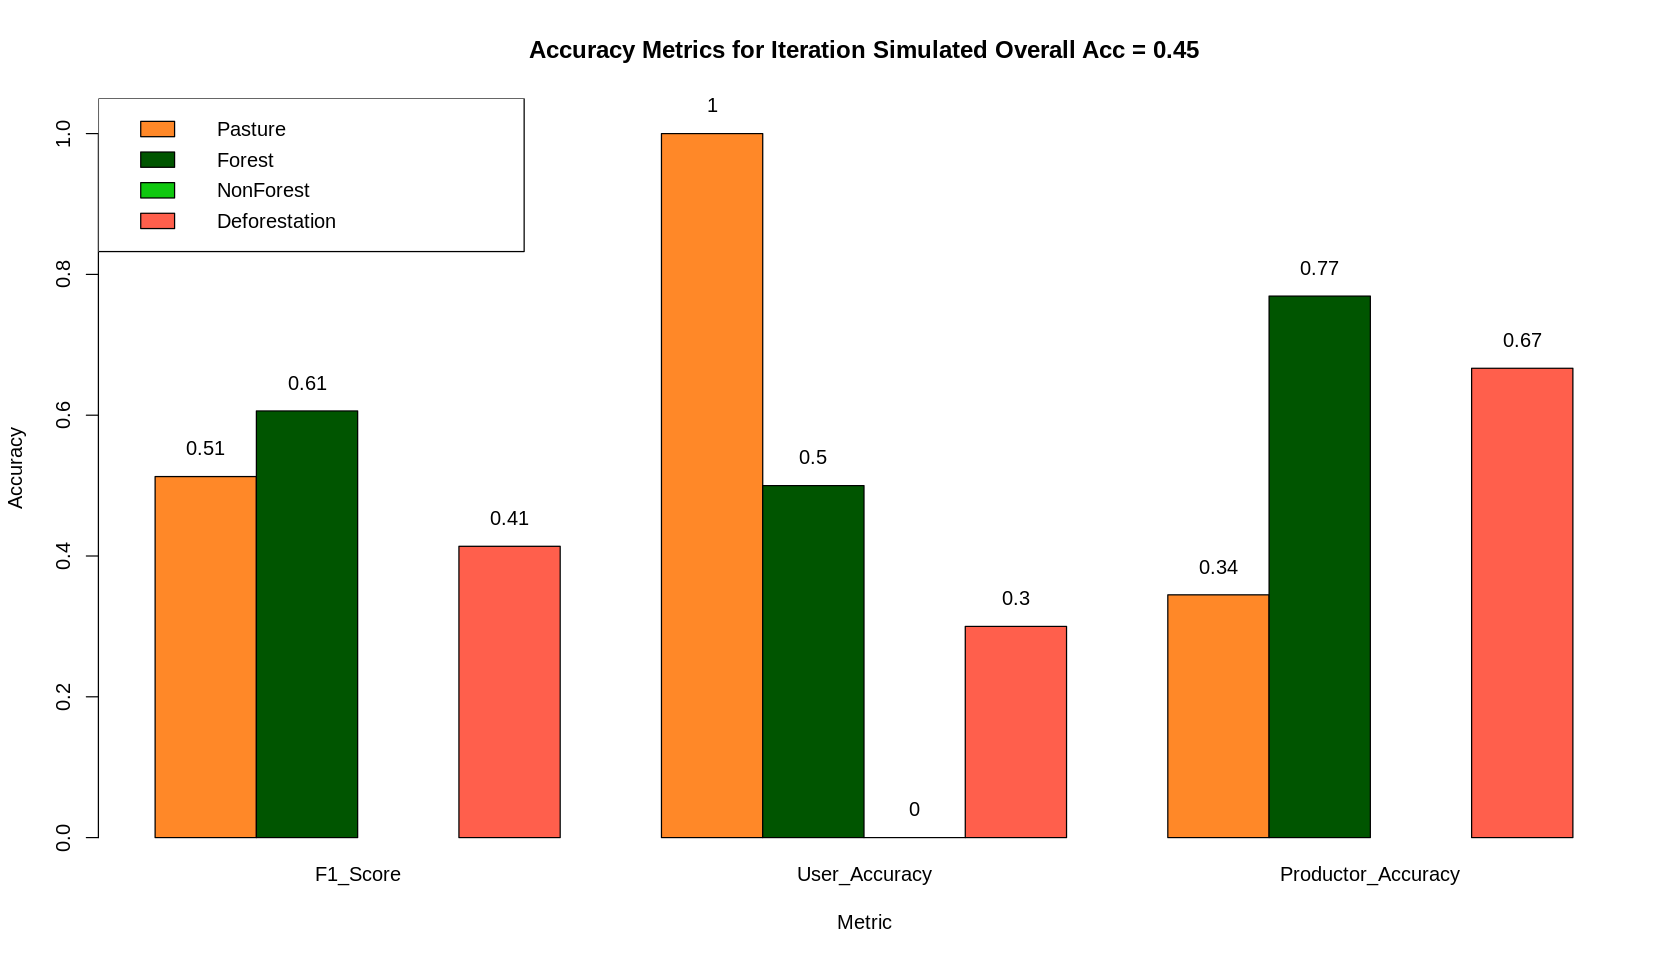

In [298]:
# This data is plotted as follows.
options(repr.plot.width = 14, repr.plot.height = 8)
data_ <- as.matrix(metrics_tb)
barp <- barplot(
    data_,
    main = paste(
        "Accuracy Metrics for Iteration Simulated",
        paste("Overall Acc =", round(overall_accuracy, 2))
    ),
    xlab = "Metric",
    ylab = "Accuracy",
    col = labels_summary$color,
    ylim = c(0, 1.05),
    beside = TRUE
)
text(barp, data_ + 0.04, labels = round(data_, 2))
legend(
    "topleft",
    labels_summary$label,
    fill = labels_summary$color
)

#### Defining new samples using the entropy

In [301]:
prediction_ <- prediction %>%
    dplyr::select(-predicted, -time_series)

metrics <- data_metrics %>%
    dplyr::select(-label)

prediction_ <- cbind(prediction_, metrics) %>%
    dplyr::arrange(dplyr::desc(.data$entropy)) %>%
        dplyr::filter(label == prediction) %>%
            dplyr::select(-prediction)

prediction_

sample_id longitude latitude  start_date end_date   label  
Sample 3  985      -65.01243 -10.71761 2018-07-28 2019-07-28 Pasture
Sample 4  683      -64.05971 -10.19263 2018-07-28 2019-07-28 Pasture
Sample 1  724      -63.96750 -10.00002 2018-07-28 2019-07-28 Pasture
Sample 2  946      -64.83574 -10.26662 2018-07-28 2019-07-28 Pasture
Sample 5 1121      -64.74975 -10.24982 2018-07-28 2019-07-28 Pasture
         cube            entropy    least_conf margin_conf ratio_conf
Sample 3 sentinel-077095 0.50654592 0.27162774 0.40732865   3.910847 
Sample 4 sentinel-077095 0.34735543 0.14720297 0.22080442   8.057791 
Sample 1 sentinel-077095 0.22036941 0.07682737 0.11524101  16.354938 
Sample 2 sentinel-077095 0.13910283 0.04168113 0.06252132  30.989268 
Sample 5 sentinel-077095 0.07910395 0.02039011 0.03058516  64.391204

In [306]:
last_ <- dplyr::last(prediction_$sample_id)

samples_clean <- new_samples %>%
    dplyr::filter(sample_id == last_) %>%
        dplyr::mutate(label = true_label) %>%
            dplyr::select(-true_label)

new_samples <- new_samples %>%
    dplyr::filter(sample_id != last_)

labelled_data <- rbind(labelled_data, samples_clean)

dplyr::select(labelled_data, -time_series) %>%
    dplyr::filter(label == "Pasture")

sample_id longitude latitude  start_date end_date   label   cube           
1  491      -64.66035 -10.34443 2018-07-28 2019-07-28 Pasture sentinel-077095
2 1158      -64.91859 -10.30817 2018-07-28 2019-07-28 Pasture sentinel-077095
3 1153      -65.01377 -10.80863 2018-07-28 2019-07-28 Pasture sentinel-077095
4 1165      -65.12893 -10.10746 2018-07-28 2019-07-28 Pasture sentinel-077095
5  749      -64.92910 -10.09685 2018-07-28 2019-07-28 Pasture sentinel-077095
6 1121      -64.74975 -10.24982 2018-07-28 2019-07-28 Pasture sentinel-077095

### Real iteractions

In [329]:
iteration <- function(training_samples, samples_tb, sits_method, reference_labels) {
    
    classification_model  <- sits_train(training_samples, ml_method = sits_method)
    
    prediction_fct <- samples_tb %>% 
        dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>%
            sits::sits_classify(ml_model = classification_model) %>% 
                dplyr::pull(predicted) %>%
                    purrr::map_chr(magrittr::extract("class")) %>%
                        factor(levels = reference_labels)
    
    reference_fct <- samples_tb %>%
        dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>%
            pull(label) %>% 
                factor(levels = reference_labels)
    
    return(
        caret::confusionMatrix(data = prediction_fct, reference = reference_fct) %>%
            get_accuracy_metrics() %>% 
                dplyr::mutate(n_samples = nrow(training_samples))
    )
}

In [340]:
# Number of iterations
n_iterations <- 30
# Number of experiments
n_experiments <- 10
# Number of labels to be selected on each iteration.
n_samples <- length(labels_summary$label) * n_samples_per_label
# data to be used
samples_tb <- new_samples %>%
    dplyr::mutate(label = true_label) %>%
        dplyr::select(-true_label)
# data labelled
labelled_samples <- labelled_data
# training samples
training_samples <- labelled_samples
# Labels
reference_labels <- labels_summary$label
# Cores
cores <- parallel::detectCores() / 2
# Accuracy History
accuracy_tb <- tibble::tibble()

In [337]:
for (i in 1:n_iterations) {
        
    unlabelled_tb <- samples_tb %>% 
        dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
            dplyr::mutate(label = NA)
  
    # Use AL random sampling to choose the samples to be sent to the oracle. 
    oracle_samples <- training_samples %>% 
        dplyr::bind_rows(unlabelled_tb) %>% 
            al_random_sampling(sits_method = sits_tempcnn_method, multicores = 1) %>% 
                dplyr::filter(sample_id %in% unlabelled_tb$sample_id) %>% 
                    dplyr::arrange(dplyr::desc(entropy)) %>% 
                        dplyr::slice_head(n = n_samples) %>% 
                            dplyr::select(-entropy, -least_conf, -margin_conf, -ratio_conf, -new_label)
    
    # Get the true labels from the oracle
    oracle_samples <- oracle_samples %>% 
        dplyr::left_join(y = samples_tb %>% 
            dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
                dplyr::select(true_label = label, sample_id), by = "sample_id") %>% 
                    dplyr::mutate(label = true_label) %>%
                            dplyr::select(-true_label)
                    
    # Add the oracle samples to the training set.
    training_samples <- training_samples %>% 
        dplyr::bind_rows(oracle_samples)
    
    # Do the classification and estimate the accuracy.
    acc_iter <- iteration(training_samples, samples_tb, sits_tempcnn_method, reference_labels) %>% 
        dplyr::mutate(type = "AL Random Sampling", iteration = i)
    
    accuracy_tb <- accuracy_tb %>% 
        dplyr::bind_rows(acc_iter)
}

In [341]:
data_ <- get_train_test_set(training_samples, prop = 0.7)

In [342]:
# train a machine learning model using tempCNN
tempCNN_model <- sits_train(
    data = data_$train,
    ml_method = sits_tempcnn_method
)
class <- data_$test %>% sits_classify(tempCNN_model)
results <- sits_accuracy(class)
results

Confusion Matrix and Statistics

           Reference
Prediction  Forest Pasture NonForest
  Forest         0       0         1
  Pasture        1       1         2
  NonForest      1       0         0

Overall Statistics
                            
 Accuracy : 0.1667          
   95% CI : (0.0042, 0.6412)
                            
    Kappa : -0.1111         

Statistics by Class:

                          Class: Forest Class: Pasture Class: NonForest
Prod Acc (Sensitivity)             0.00           1.00           0.0000
Specificity                        0.75           0.40           0.6667
User Acc (Pos Pred Value)          0.00           0.25           0.0000
Neg Pred Value                     0.60           1.00           0.4000

#### Comparing The results with No AL

In [317]:
experiment <- function(x, labelled_samples, n_samples, sits_method){

    #---- Test without active learning ----
    training_samples <- labelled_samples
    for (i in 1:n_iterations) {
    
        new_samples_ <- samples_tb %>% 
            dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
                dplyr::sample_n(size = n_samples)
    
        training_samples <- training_samples %>% 
            dplyr::bind_rows(new_samples_)
     
        acc_iter <- iteration(training_samples, samples_tb, sits_method, reference_labels) %>% 
            dplyr::mutate(type = "Without AL", iteration = i)
    
        accuracy_tb <- accuracy_tb %>% 
            dplyr::bind_rows(acc_iter)
    }
    
    #---- Test using AL random sampling ----
    training_samples <- labelled_samples
    for (i in 1:n_iterations) {
        
        unlabelled_tb <- samples_tb %>% 
            dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
                dplyr::mutate(label = NA)
  
        # Use AL random sampling to choose the samples to be sent to the oracle. 
        oracle_samples <- training_samples %>% 
            dplyr::bind_rows(unlabelled_tb) %>% 
                al_random_sampling(sits_method = sits_method, multicores = 1) %>% 
                    dplyr::filter(sample_id %in% unlabelled_tb$sample_id) %>% 
                        dplyr::arrange(dplyr::desc(entropy)) %>% 
                            dplyr::slice_head(n = n_samples) %>% 
                                dplyr::select(-entropy, -least_conf, -margin_conf, -ratio_conf, -new_label)
    
        # Get the true labels from the oracle
        oracle_samples <- oracle_samples %>% 
            dplyr::left_join(y = samples_tb %>% 
                dplyr::filter(!(sample_id %in% training_samples$sample_id)) %>% 
                    dplyr::select(true_label = label, sample_id), by = "sample_id") %>% 
                        dplyr::mutate(label = true_label) %>%
                              dplyr::select(-true_label)
                    
        # Add the oracle samples to the training set.
        training_samples <- training_samples %>% 
            dplyr::bind_rows(oracle_samples) %>% 
                magrittr::set_class(class(sits::cerrado_2classes))
    
        # Do the classification and estimate the accuracy.
        acc_iter <- iteration(training_samples, samples_tb, sits_method, reference_labels) %>% 
            dplyr::mutate(type = "AL Random Sampling", iteration = i)
    
        accuracy_tb <- accuracy_tb %>% 
            dplyr::bind_rows(acc_iter)
    }
    
    return(
        accuracy_tb %>% 
            dplyr::mutate(experiment = x)
    )
}

In [312]:
# Number of iterations
n_iterations <- 5
# Number of experiments
n_experiments <- 10
# Number of labels to be selected on each iteration.
n_samples <- length(labels_summary$label) * n_samples_per_label
# data to be used
samples_tb <- new_samples %>%
    dplyr::mutate(label = true_label) %>%
        dplyr::select(-true_label)
# data labelled
labelled_samples <- labelled_data
# Labels
reference_labels <- labels_summary$label
# Cores
cores <- parallel::detectCores() / 2
# Accuracy History
accuracy_tb <- tibble::tibble()

In [319]:
accuracy_lst <- parallel::mclapply(
    1:n_experiments,
    experiment, 
    labelled_samples = labelled_samples,
    n_samples = n_samples,
    sits_method = sits_tempcnn_method,
    mc.cores = 1
)

In [320]:
save_file.tb(accuracy_lst, "./data/output/accuracy_lst", "rda")

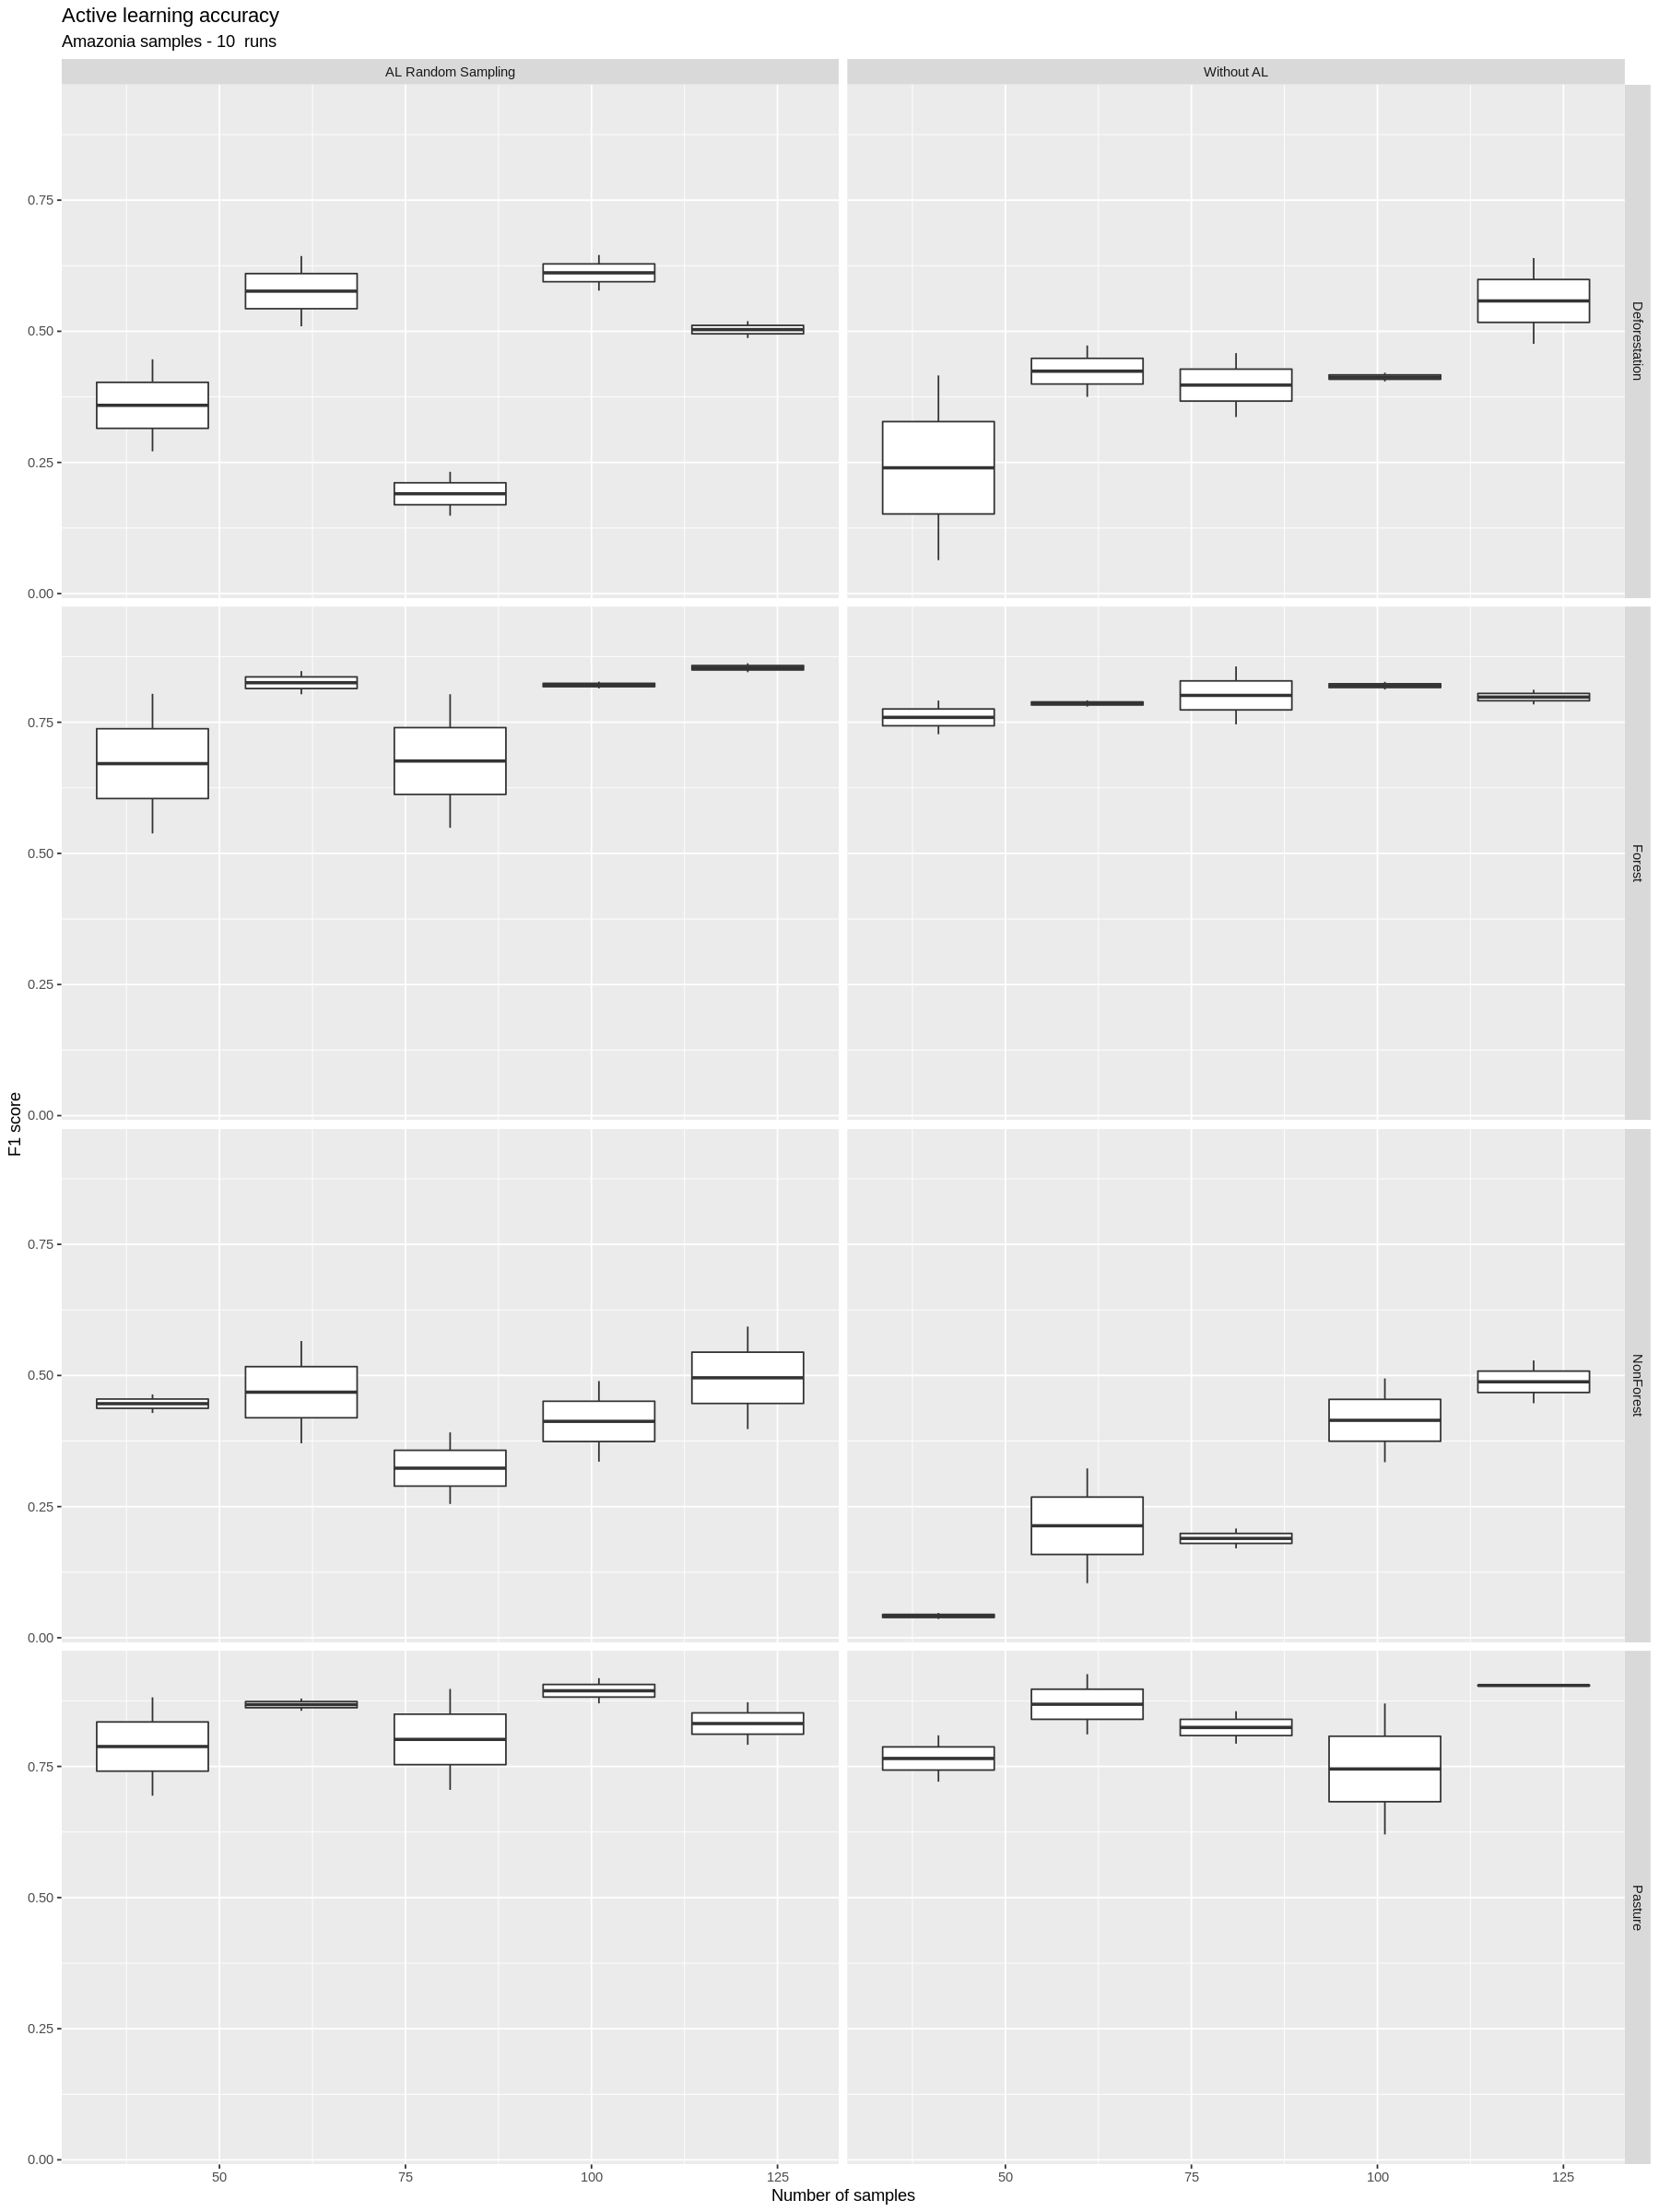

In [321]:
options(repr.plot.width = 15, repr.plot.height = 20)
accuracy_lst %>% 
    dplyr::bind_rows() %>% 
        dplyr::filter(metric == "f1_score") %>%
            ggplot2::ggplot() + 
            ggplot2::geom_boxplot(ggplot2::aes(x = n_samples, y = accuracy, group = n_samples)) +
            ggplot2::facet_grid(cols = dplyr::vars(type), rows = dplyr::vars(class)) +
            ggplot2::labs(title = "Active learning accuracy", subtitle = paste("Amazonia samples", paste(n_experiments, " runs"), sep = " - ")) +
            ggplot2::xlab("Number of samples") + 
            ggplot2::ylab("F1 score")

ggplot2::ggsave(filename = "./data/output/comparison_deforestation.png", width = 297, height = 210, units = "mm")

### Sentinel-2 Cube Classification

[1] "2018-07-28" "2018-08-13" "2018-08-29" "2018-09-14" "2018-09-30"
 [6] "2018-10-16" "2018-11-01" "2018-11-17" "2018-12-03" "2018-12-19"
[11] "2019-01-01" "2019-01-17" "2019-02-02" "2019-02-18" "2019-03-06"
[16] "2019-03-22" "2019-04-07" "2019-04-23" "2019-05-09" "2019-05-25"
[21] "2019-06-10" "2019-06-26" "2019-07-12" "2019-07-28"

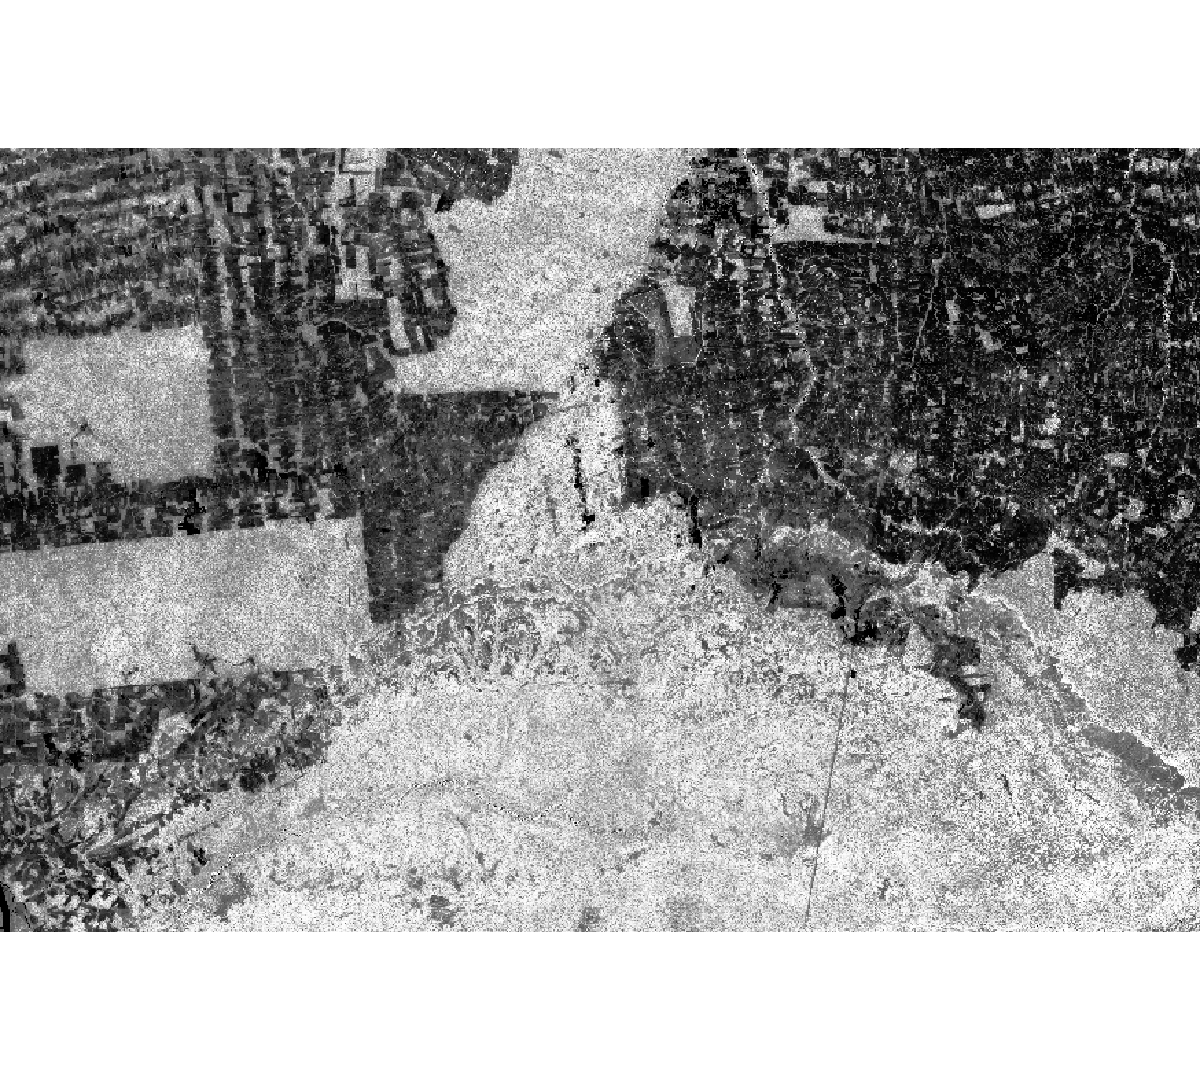

In [12]:
sentinel_cube <- sits_cube(
    source = "BDC",
    collection = "S2-SEN2COR_10_16D_STK-1",
    satellite = "SENTINEL-2",
    sensor = "MSI",
    resolution = "10m",
    data_dir = "./data/raster/Sentinel-2/077095",
    parse_info = c("X1", "X2", "X3", "X4", "X5", "tile", "date", "X6", "band")
)
options(repr.plot.width = 10, repr.plot.height = 9)
plot(sentinel_cube, band = "NDVI", time = 24)
sits_timeline(sentinel_cube)

In [62]:
samples_tb <- random_samples_per_class(samples, 150)

In [71]:
sits_model <- sits_train(data = samples_tb, ml_method = sits_method)

In [ ]:
output <- "./data/raster/classification"
probs_cube <- sits_classify(
    data = sentinel_cube,
    ml_model = sits_model,
    roi = convert_bbox_epsg_4326(
        list(
            lon_min = -64.9583215,
            lon_max = -64.7443645,
            lat_min = -10.7323301,
            lat_max = -10.5699696
        )
    ),
    output_dir = output,
    memsize = 6,
    multicores = 2,
    verbose = TRUE,
    progress = TRUE
)

label_cube <- sits_label_classification(probs_cube, output_dir = output)

Using 9 blocks of size (213 x 2376)

Starting classification of '077095' at 2021-12-11 18:56:31



  |======================                            |  44%

downsample set to c(2,2,1)


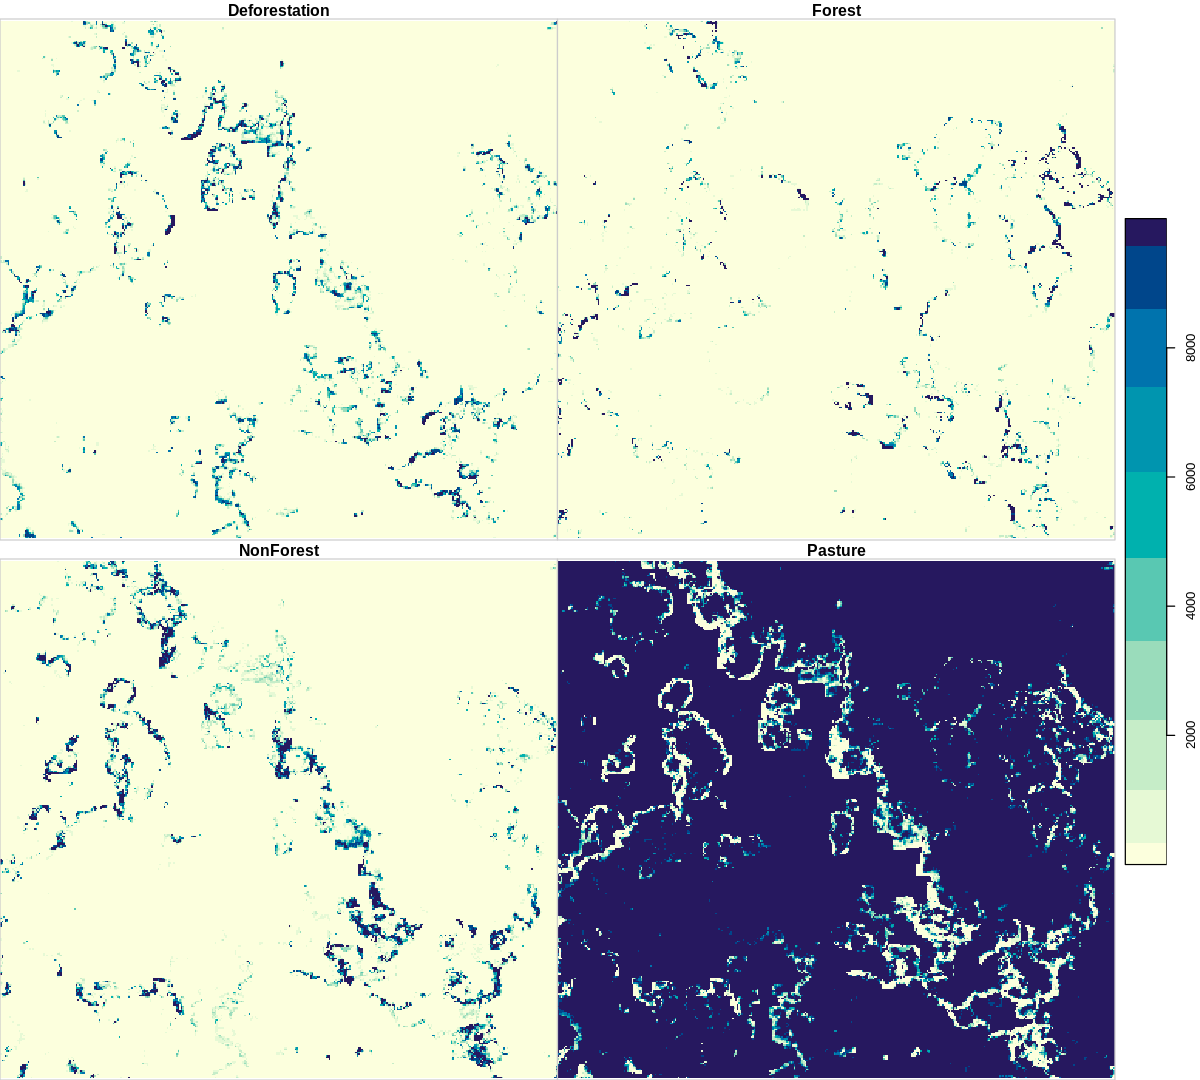

In [66]:
plot(probs_cube, title = "Ground truth")

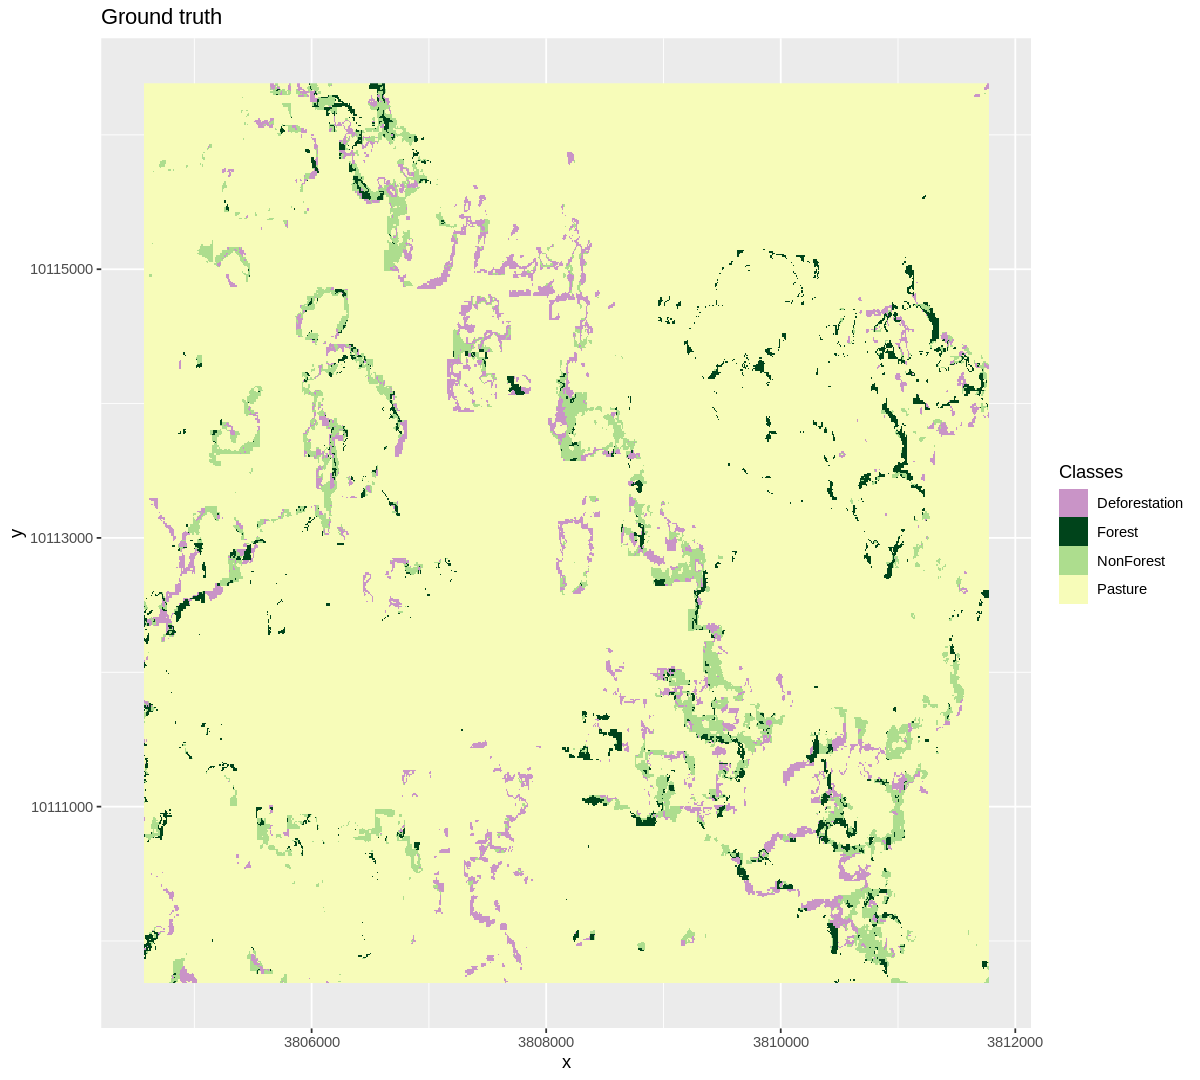

In [67]:
plot(label_cube, title = "Ground truth")

## Conclusion

As a result, it is expected to develop a case study about the environment for exploratory analysis of LULC combined with time series collected from remote sensing images to present attributes that demonstrate the calculation of accuracy and quality of classified maps.

It also seeks to develop software solutions for the dissemination of these methods to a scientific community that does not master information technology techniques.

## References

[References...](https://github.com/AbnerErnaniADSFatec/sample-assessment-geodatascience/blob/main/README.md#references)